<h2>GOAL</h2>
Develop a model to predict the Probability of Default (PD) of start-up companies with a supervised non-linear model. This kind of models allow investors to make a statistically rational investment by only lending money to the start-ups most likely to succeed in the market.

<h2>The exercise</h2>
This notebook contains a simplistic code to create a PD non-linear model, namely it builds a toy 'model' which is non-optimized. You must improve the current code.

<h2>Minimum standards required to pass the exercise</h2>

- Provide a detailed description of the 10 most relevant variables at business level. Please, provide as well a proper substantiation (either from business intuition or using statistical tools) about the motivation of choosing those 10 variables. Discuss their business meaning.


- Improve the current non-linear dummy model performance metric (AUC) on the Test dataset without introducing additional biases. You can do so by (the following options are not mandatory, they are just provided as a guideline) adding more variables to the model, and/or adding feature engineering methods, and/or optimizing the current algorithm hyperparameters, and/or usin other Machine Learning algorithms. (Please keep in mind that when using a non-linear model, the introduction of Weight of Evidences is not necessary)


- Please provide explainability for the model and discuss whether the results have business "sense" or not. You can do so by (the following options are not mandatory, they are just provided as a guideline) using shapley values or methods embeded in the algorithm you decide to use.


- The delivery must be done with 2 files: A .ipynb and the same .ipynb file converted to .html (in your jupyter notebook: File -> Downloas as -> HTML (.html)). To provide explanations, use 'markdown' cells (like this one) as much as you need. The provided .pynb file must be functional, i.e. must be able to run in one go without errors.

# The code

Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
#model libraries 
from sklearn.model_selection import train_test_split
# from sklearn.feature_selection import f_classif
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble        import RandomForestClassifier
from sklearn.metrics         import roc_auc_score, roc_curve,classification_report
#To install sklearn, type in a terminal (anaconda prompt) the following line: conda install -c anaconda scikit-learn
import shap

Loading datasets

In [2]:
df = pd.read_csv("C:/Users/chiki/Desktop/historical_data.csv", index_col='ID')

In [3]:
df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X56,X57,X58,X59,X60,X61,X62,X63,X64,TARGET
ID,,,,,,,,,,,,,,,,,,,,,
A1,0.004513,0.59322,0.050671,1.08540,-233.820,0.00903,0.008017,0.62108,1.01810,0.36844,...,0.017824,0.012250,0.98218,0.00000,1.4846,7.7253,275.850,1.3232,2.2043,0
A3,0.009384,0.21804,0.528450,3.42360,31.312,-0.21350,0.009530,3.49980,0.99865,0.76312,...,-0.001349,0.012297,1.00130,0.00000,7.2205,7.6368,34.577,10.5560,9.0793,0
A4,-0.029314,0.89582,0.024423,1.04590,-74.655,0.00000,-0.034399,0.11629,1.26320,0.10418,...,0.035999,-0.281400,1.02720,3.43670,4.8869,4.8991,153.720,2.3745,2.8477,0
A6,-0.201010,1.14050,-0.234190,0.79466,-41.678,-1.54010,-0.201010,-0.12318,7.22300,-0.14049,...,-0.005083,1.430800,1.02780,0.00000,17.0460,24.0750,57.632,6.3333,77.0810,0
A7,0.094373,0.24853,0.679850,3.73550,156.550,0.00000,0.124870,3.02360,1.31060,0.75147,...,0.128590,0.125590,0.90613,0.00000,7.2914,13.5800,69.214,5.2735,18.3010,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A5904,-0.272230,0.32789,0.533430,2.62680,64.808,-1.02410,-0.272230,2.04980,1.33990,0.67211,...,-0.202940,-0.405030,1.20320,0.00000,5.3476,2.7891,89.323,4.0863,9.6618,0
A5905,0.059593,0.65904,0.049671,1.11910,-36.758,0.11068,0.059593,0.48762,1.09860,0.32136,...,0.089790,0.185440,0.91021,0.75349,8.3641,4.4477,133.560,2.7328,2.1357,0
A5907,0.007439,0.84851,0.101600,1.21590,-16.338,0.11702,0.016560,0.17854,1.87930,0.15149,...,0.042288,0.049105,0.99125,2.21740,11.1000,5.7689,91.409,3.9931,4.3936,0


## Exploring the data set

In [4]:
#Basic data profile: Missings and data type
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 4137 entries, A1 to A5910
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      4134 non-null   float64
 1   X2      4134 non-null   float64
 2   X3      4134 non-null   float64
 3   X4      4121 non-null   float64
 4   X5      4129 non-null   float64
 5   X6      4134 non-null   float64
 6   X7      4134 non-null   float64
 7   X8      4124 non-null   float64
 8   X9      4136 non-null   float64
 9   X10     4134 non-null   float64
 10  X11     4134 non-null   float64
 11  X12     4121 non-null   float64
 12  X13     4137 non-null   float64
 13  X14     4134 non-null   float64
 14  X15     4131 non-null   float64
 15  X16     4124 non-null   float64
 16  X17     4124 non-null   float64
 17  X18     4134 non-null   float64
 18  X19     4137 non-null   float64
 19  X20     4137 non-null   float64
 20  X21     4062 non-null   float64
 21  X22     4134 non-null   float64
 22  X23

- This infomarmation make sense because, we don´t have any categorical variables

In [5]:
#Looking unique values
print(df.nunique().iloc[:20])

X1     3979
X2     3975
X3     4007
X4     3910
X5     4064
X6     2508
X7     3999
X8     3996
X9     3550
X10    3978
X11    4002
X12    4018
X13    4003
X14    3999
X15    4024
X16    4033
X17    3894
X18    3999
X19    4007
X20    3825
dtype: int64


In [6]:
print(df.nunique().iloc[20:40])

X21    3332
X22    3647
X23    3996
X24    3928
X25    4009
X26    4002
X27    3511
X28    3958
X29    3785
X30    3992
X31    4021
X32    3926
X33    3954
X34    4010
X35    4001
X36    3903
X37    2291
X38    3958
X39    4006
X40    4022
dtype: int64


In [7]:
print(df.nunique().iloc[40:60])

X41    3958
X42    3647
X43    3856
X44    3990
X45    3824
X46    3938
X47    3819
X48    3968
X49    3968
X50    3916
X51    3969
X52    3912
X53    3867
X54    3825
X55    4045
X56    3992
X57    3943
X58    3725
X59    2281
X60    3812
dtype: int64


In [8]:
print(df.nunique().iloc[60:64])

X61    3983
X62    3961
X63    3975
X64    3931
dtype: int64


- With this information cornfirm that we don't have many repeted values

In [9]:
# Basic statistical indicators
print(df.describe())

                X1           X2           X3           X4            X5  \
count  4134.000000  4134.000000  4134.000000  4121.000000  4.129000e+03   
mean     -0.075833     0.545945     0.187800     5.418010  3.662161e+01   
std       7.238919     1.463054     1.374335   108.643105  2.571938e+04   
min    -463.890000     0.000000   -72.067000     0.000000 -1.076400e+06   
25%       0.003973     0.253822     0.045326     1.101300 -4.329000e+01   
50%       0.046747     0.449170     0.219250     1.651700  4.921900e-01   
75%       0.116157     0.661658     0.421338     2.939500  4.755300e+01   
max       2.352300    72.416000    28.336000  6845.800000  1.250100e+06   

                X6           X7           X8           X9          X10  ...  \
count  4134.000000  4134.000000  4124.000000  4136.000000  4134.000000  ...   
mean     -0.110262    -0.062877     6.575037     1.584937     0.499839  ...   
std       8.226181     7.239558   121.589082     1.368766     4.416764  ...   
min    -

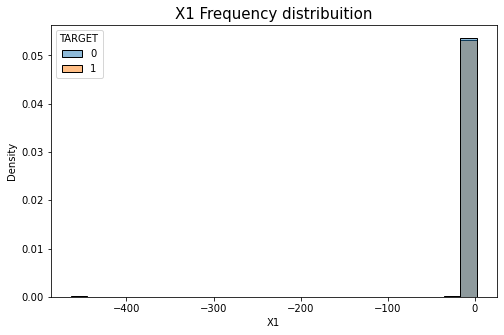

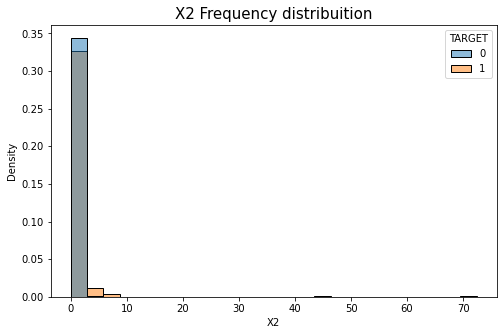

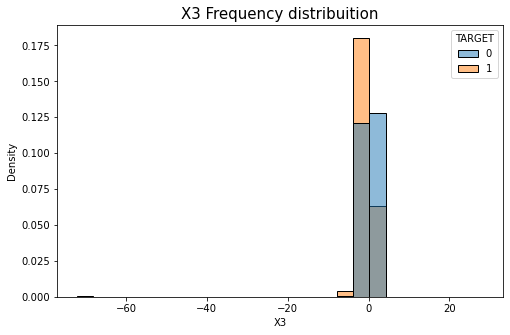

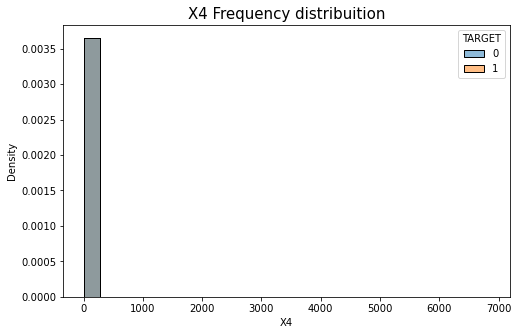

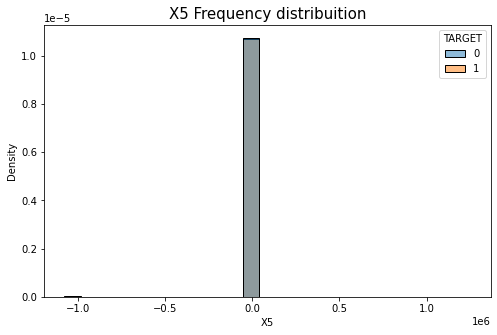

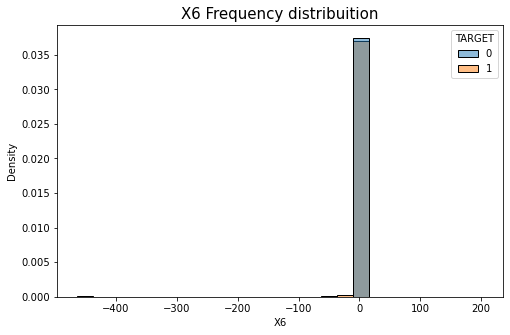

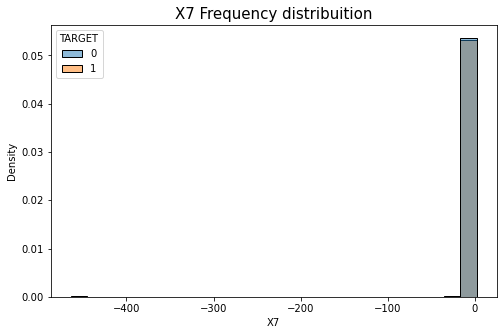

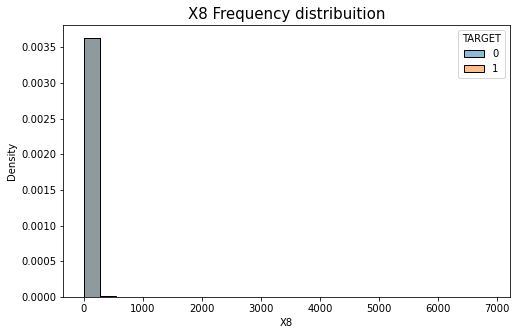

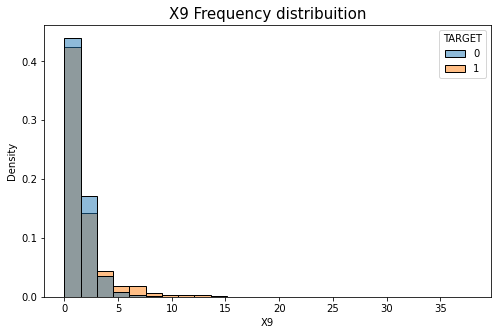

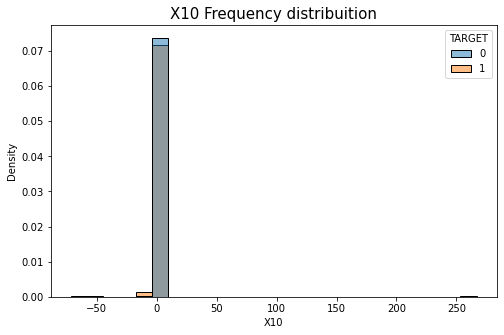

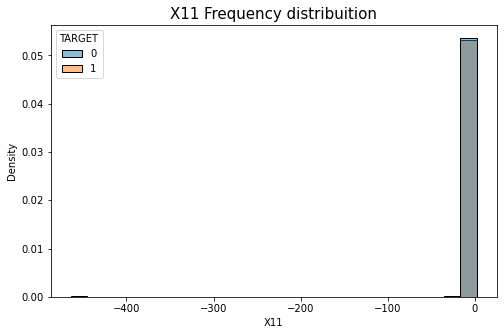

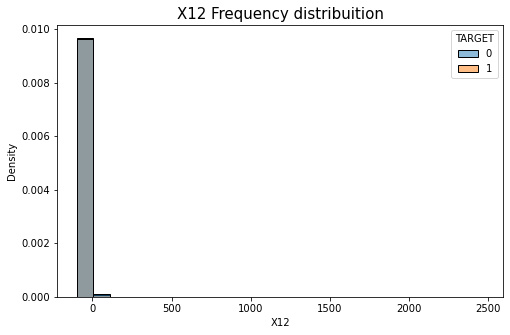

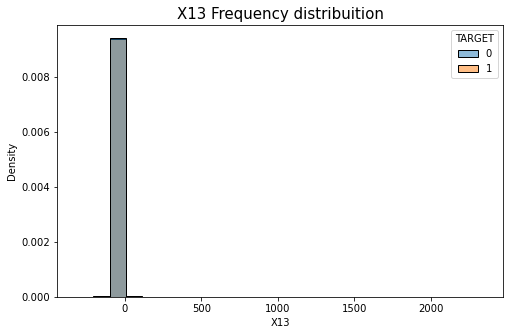

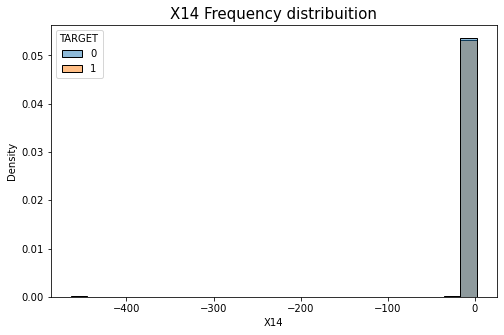

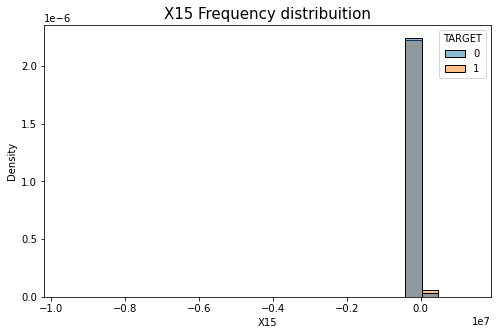

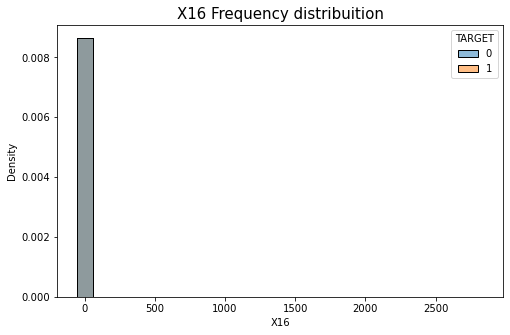

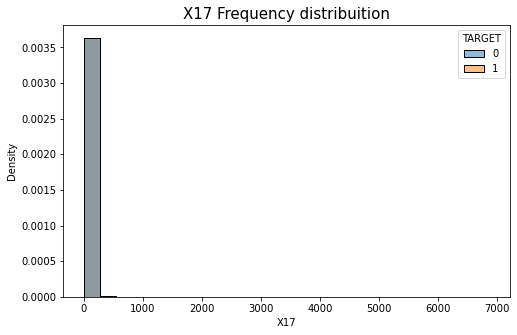

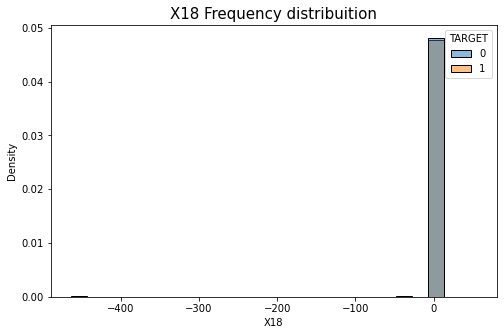

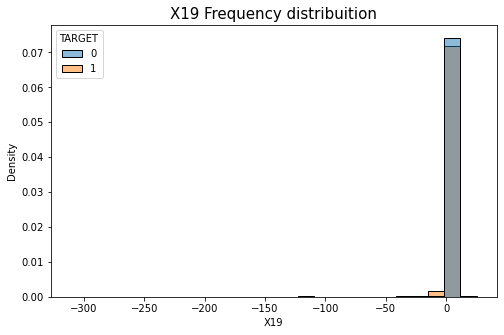

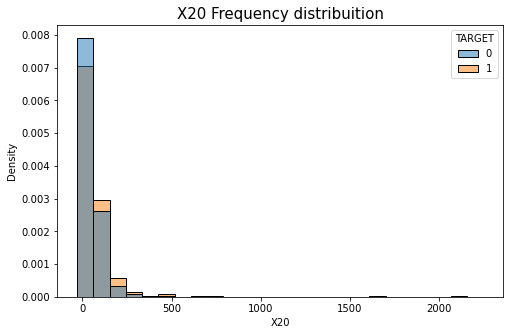

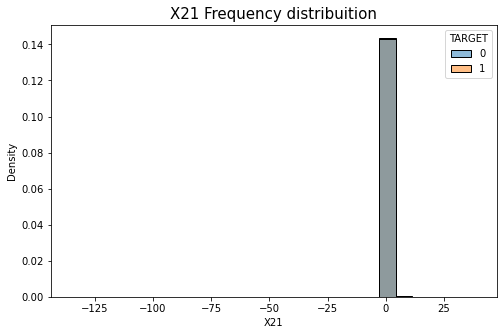

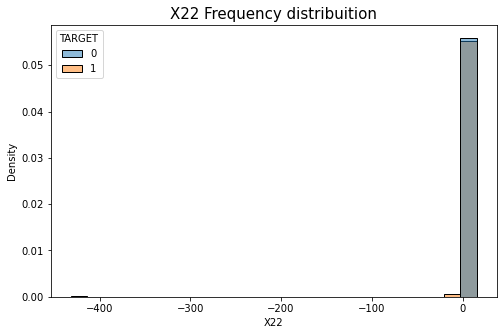

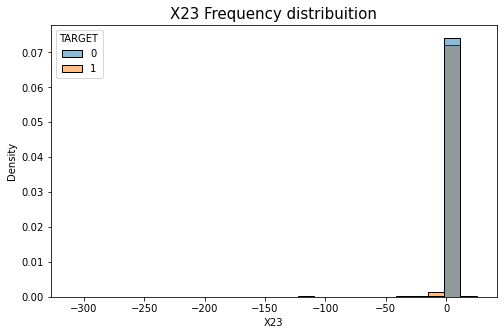

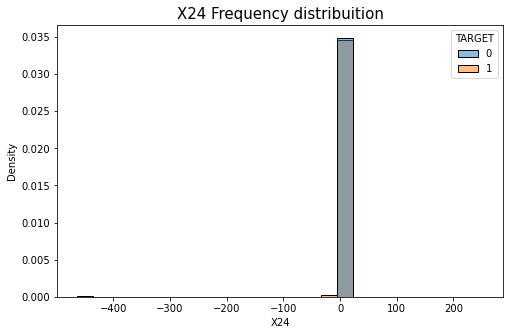

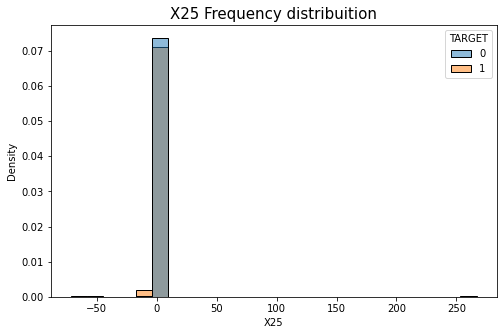

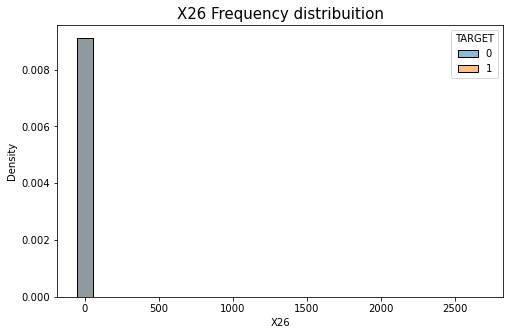

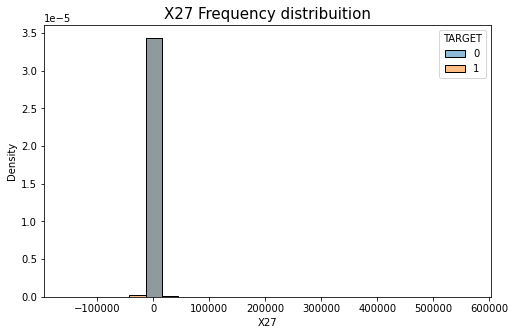

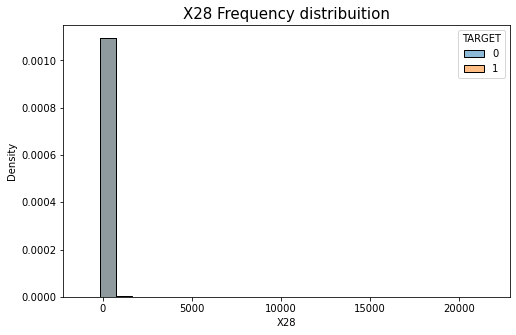

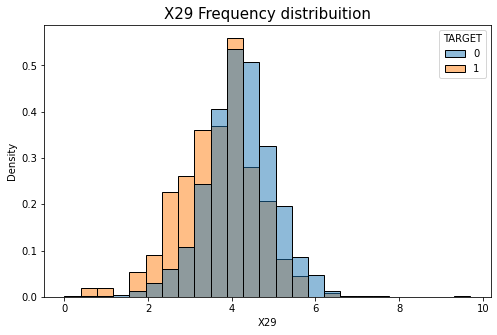

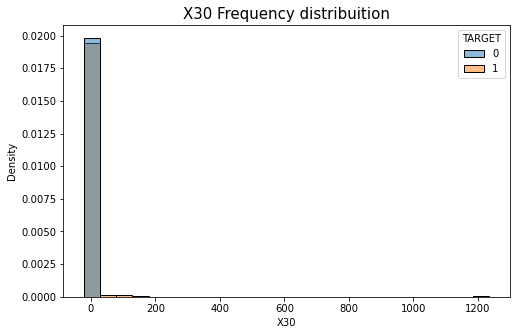

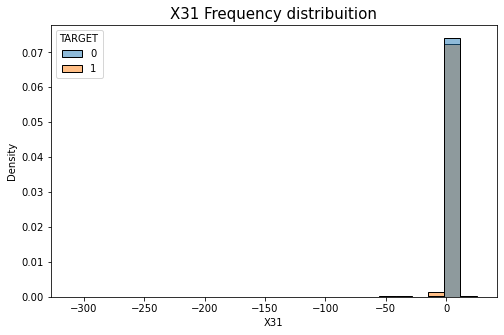

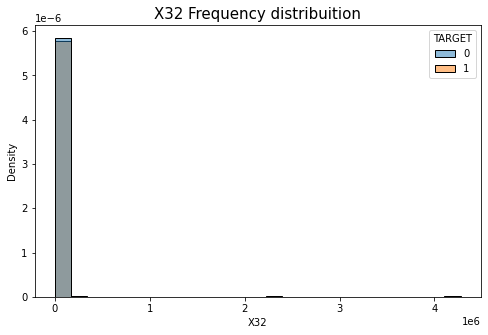

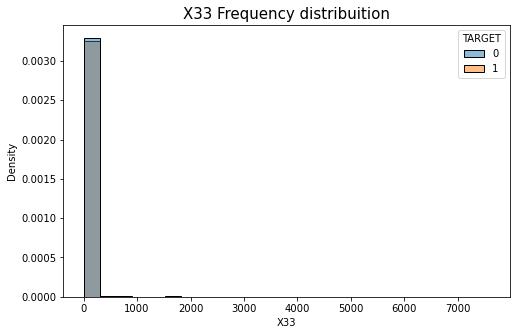

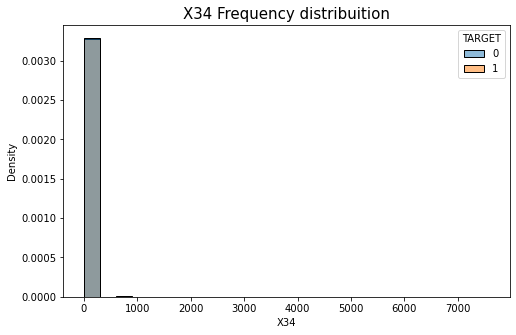

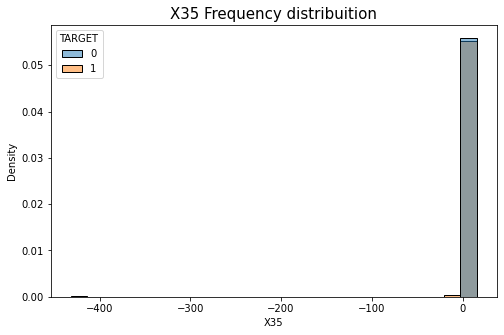

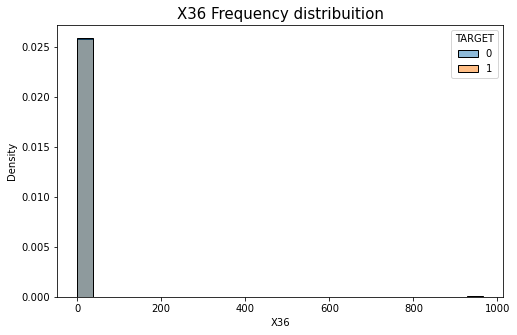

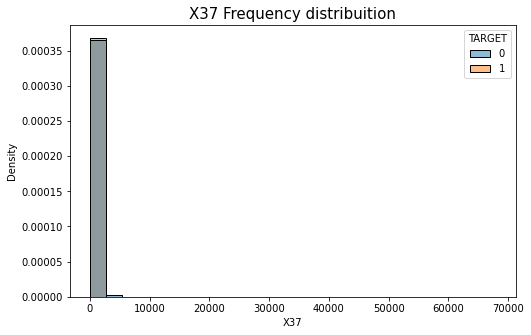

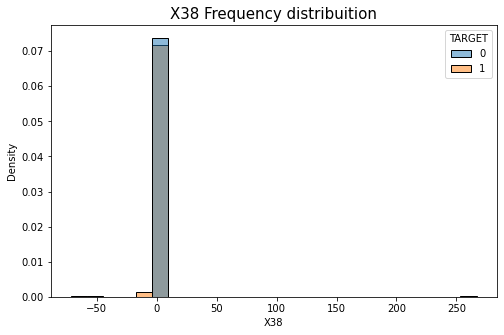

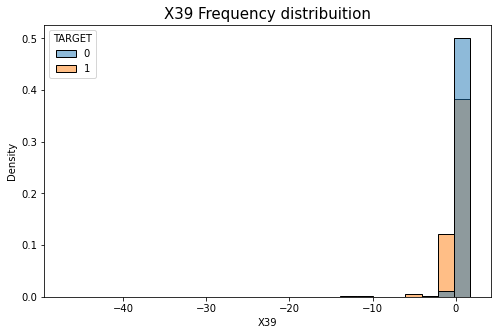

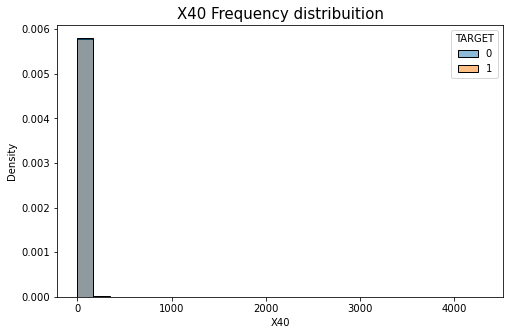

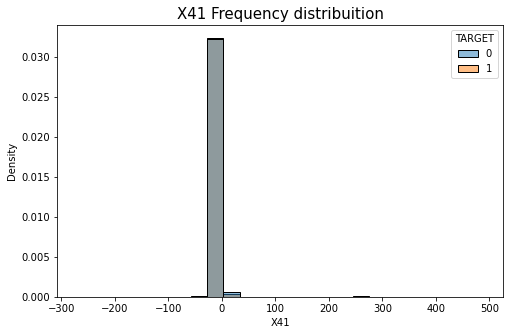

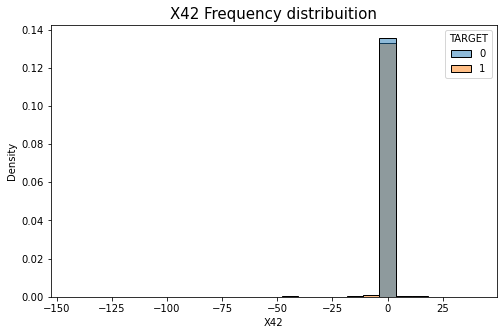

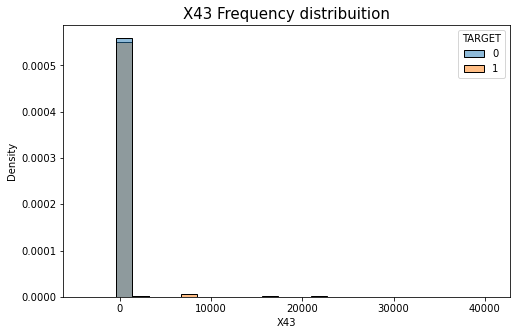

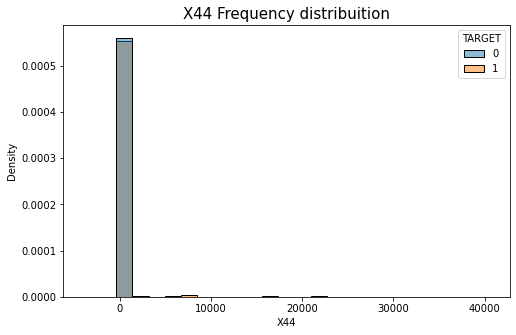

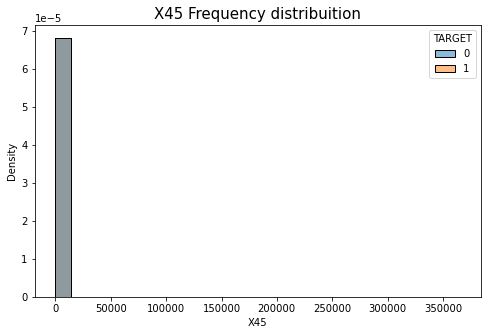

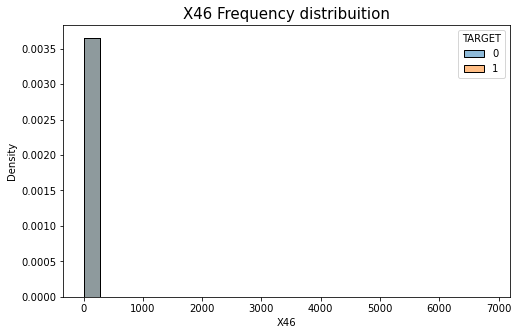

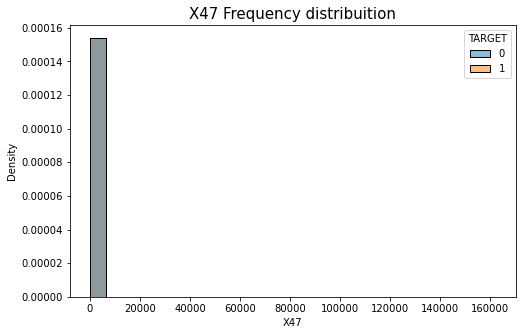

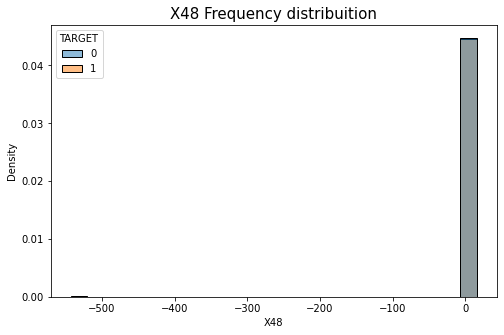

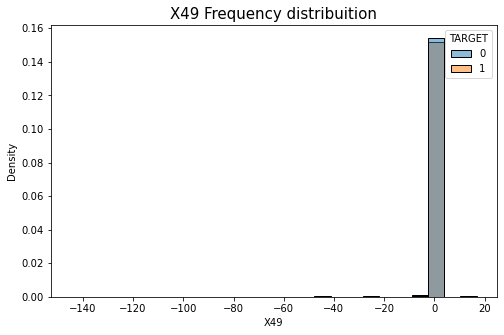

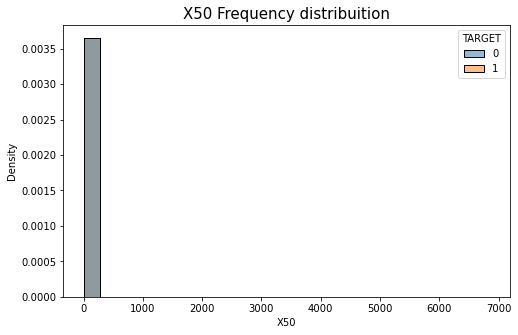

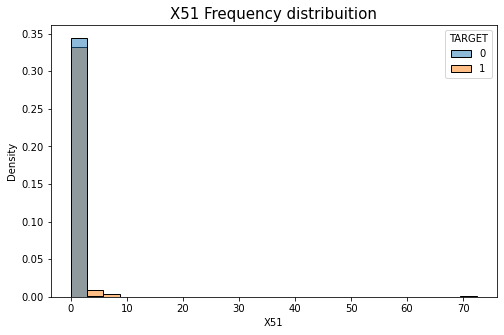

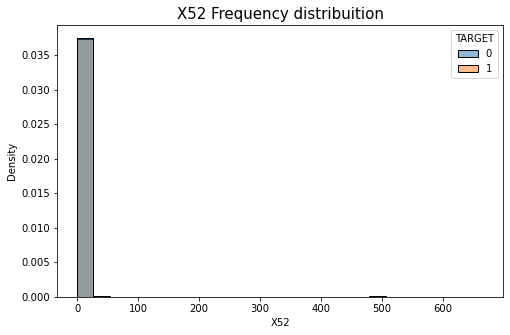

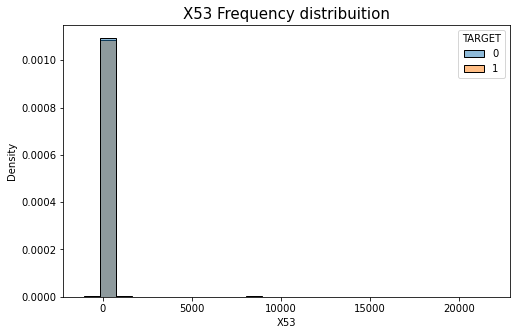

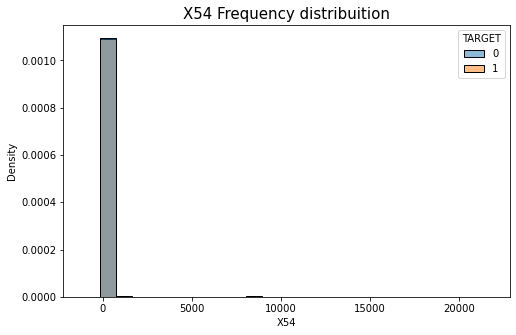

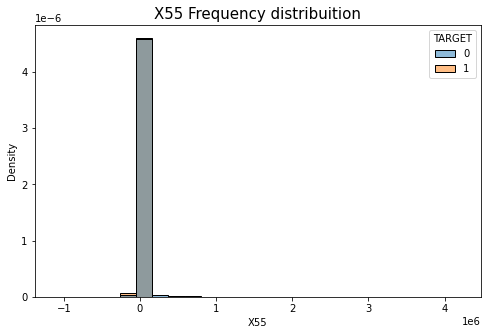

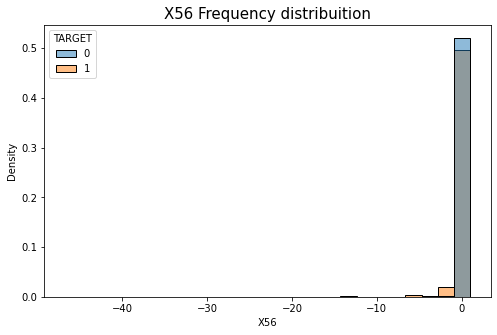

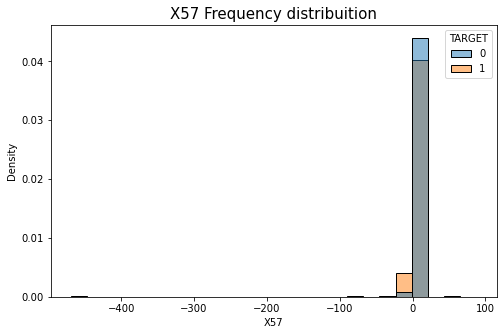

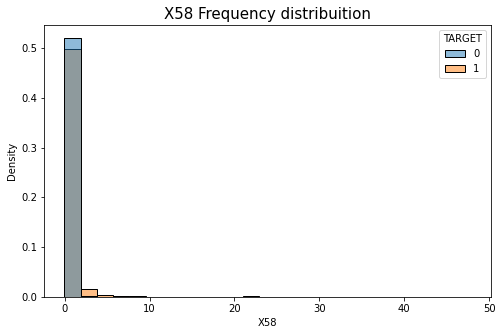

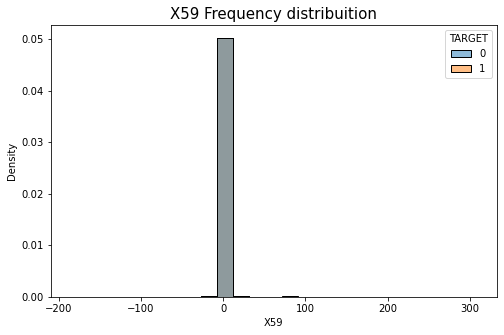

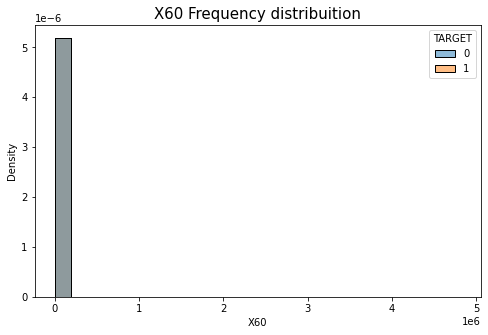

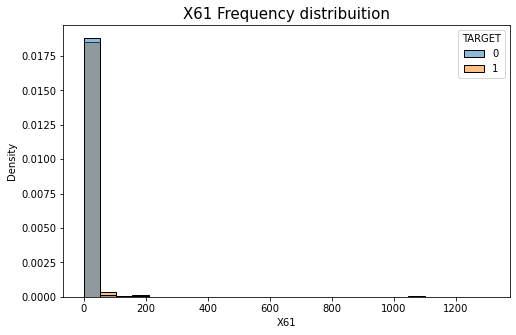

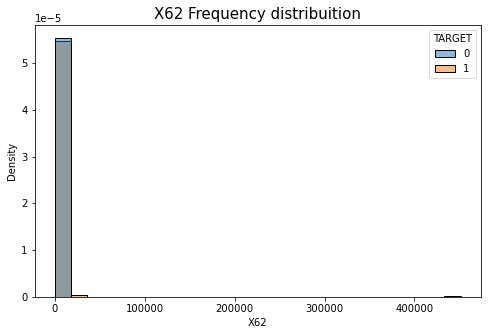

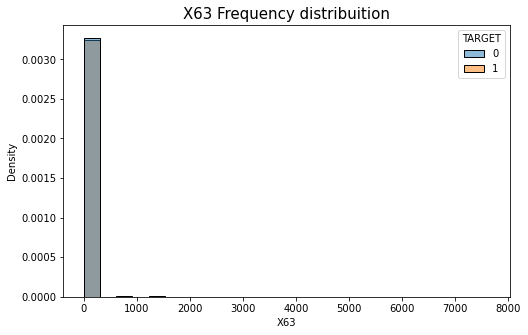

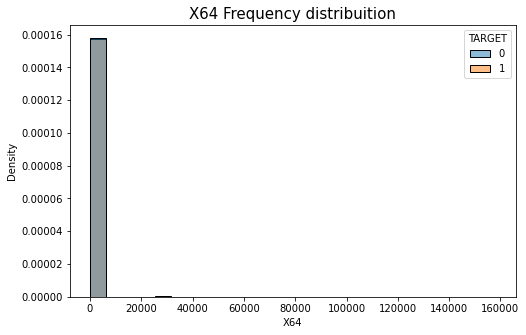

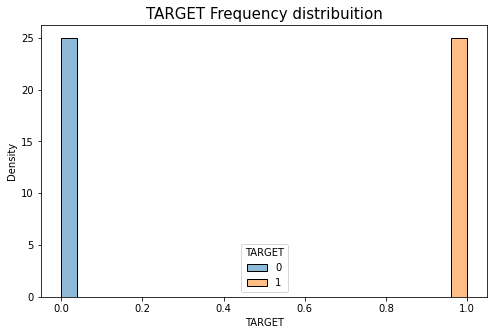

In [10]:
for key in list(df.keys()):
    if df[key].dtypes!='object':
        plt.figure(figsize = (8,5))
        g=sns.histplot(x= key,
              data=df,
              bins=25,
              hue="TARGET",
              stat = "density",
              common_norm=False,
              kde=False)
        g.set_title(key+" Frequency distribuition", fontsize=15)
        plt.show()
    else:
        print(key+" is a String Variable! numerize it first")

> Each variable has a not real  distribution, it is possible that because of outliers, which as we have seen in the graphs and with the function describes it is possible that we we have quite a few.

## Data preprocessing

In [11]:
X = df.drop('TARGET', axis=1)
y = df.TARGET

###  Outliers Treatment by Z-score

In [12]:
import numpy as np

def mod_z(col: pd.Series, thresh: float=3.5) -> pd.Series:
    med_col = col.median()
    med_abs_dev = (np.abs(col - med_col)).median()
    mod_z = 0.6745 * ((col - med_col) / med_abs_dev)
    mod_z = mod_z[np.abs(mod_z) < thresh]
    return np.abs(mod_z)

df_mod_z = X.apply(mod_z)

In [13]:
df_mod_z

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64
ID,,,,,,,,,,,,,,,,,,,,,
A1,0.554468,0.478135,0.610079,0.539352,3.474034,0.142483,0.549884,0.417924,0.333263,0.520296,...,1.208278,0.461912,0.627872,0.436524,0.614475,1.072790,0.442227,NaN,1.107044,0.506463
A100,0.441289,0.697237,1.384647,0.869478,2.733449,0.884911,0.453096,0.552323,0.288168,0.759356,...,1.501716,0.257974,0.420813,0.218403,NaN,0.713160,0.304685,3.039161,1.015592,0.591590
A1000,NaN,0.011451,1.008203,0.544972,0.790933,0.000000,NaN,0.047903,NaN,0.082968,...,1.998335,1.390185,3.265117,1.464890,NaN,1.167702,0.558481,0.340640,0.462463,NaN
A1001,0.765020,0.223616,1.095529,0.419824,0.553708,0.000000,0.903509,0.168596,NaN,0.132527,...,0.216191,0.059039,0.702858,0.052665,0.614475,0.887364,0.405372,0.302829,0.398420,NaN
A1005,0.353316,1.222700,0.785312,NaN,1.976639,0.000000,0.357122,NaN,0.128411,1.336492,...,0.362520,0.782756,0.567305,0.399349,0.614475,NaN,0.687561,0.966236,2.933059,0.438480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A994,3.339351,0.048759,1.019676,0.477541,0.482185,0.000000,NaN,0.120907,NaN,0.144124,...,0.155887,1.061678,2.749367,1.193682,0.614475,0.122109,0.367839,0.323149,0.432302,NaN
A996,1.384414,0.356916,0.000760,0.008286,0.527931,0.000000,1.081742,0.279178,1.912137,0.267919,...,0.306026,0.343425,1.521670,0.469756,NaN,0.594158,2.401334,0.105730,0.122067,0.024175
A997,1.198346,0.571007,1.504542,1.818540,NaN,0.000000,1.144547,1.155541,NaN,0.674567,...,0.348628,NaN,1.107362,NaN,0.614475,0.314487,0.445293,0.714397,1.443235,NaN


In [14]:
# get a list of columns that have more than 80% null values
na_values = X.isnull().mean()
na_values[na_values>0.8]

Series([], dtype: float64)

- As we don´t have with more than 80% null values, we won't drop any column

In [15]:
df_mod_z.isnull().sum()

X1     368
X2      84
X3      72
X4     466
X5     332
      ... 
X60    636
X61    304
X62    258
X63    264
X64    705
Length: 64, dtype: int64

In [16]:
df_filtered = X[df_mod_z >= 0]
df_filtered

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64
ID,,,,,,,,,,,,,,,,,,,,,
A1,0.004513,0.59322,0.050671,1.08540,-233.820,0.00903,0.008017,0.62108,1.01810,0.36844,...,5805.700,0.017824,0.012250,0.98218,0.0,1.4846,7.7253,NaN,1.3232,2.2043
A3,0.009384,0.21804,0.528450,3.42360,31.312,-0.21350,0.009530,3.49980,0.99865,0.76312,...,5807.700,-0.001349,0.012297,1.00130,0.0,7.2205,7.6368,34.577,10.5560,9.0793
A4,-0.029314,0.89582,0.024423,1.04590,-74.655,0.00000,-0.034399,0.11629,1.26320,0.10418,...,2037.300,0.035999,-0.281400,1.02720,NaN,4.8869,4.8991,153.720,2.3745,2.8477
A6,-0.201010,1.14050,-0.234190,0.79466,-41.678,NaN,-0.201010,-0.12318,NaN,-0.14049,...,-20.941,-0.005083,NaN,1.02780,0.0,17.0460,NaN,57.632,6.3333,NaN
A7,0.094373,0.24853,0.679850,3.73550,156.550,0.00000,0.124870,3.02360,1.31060,0.75147,...,332.250,0.128590,0.125590,0.90613,0.0,7.2914,13.5800,69.214,5.2735,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A5904,NaN,0.32789,0.533430,2.62680,64.808,NaN,NaN,2.04980,1.33990,0.67211,...,433.480,-0.202940,-0.405030,NaN,0.0,5.3476,2.7891,89.323,4.0863,9.6618
A5905,0.059593,0.65904,0.049671,1.11910,-36.758,0.11068,0.059593,0.48762,1.09860,0.32136,...,5821.800,0.089790,0.185440,0.91021,NaN,8.3641,4.4477,133.560,2.7328,2.1357
A5907,0.007439,0.84851,0.101600,1.21590,-16.338,0.11702,0.016560,0.17854,1.87930,0.15149,...,751.810,0.042288,0.049105,0.99125,NaN,11.1000,5.7689,91.409,3.9931,4.3936


In [17]:
df = pd.concat([df_filtered,df['TARGET']], axis=1)

In [18]:
df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X56,X57,X58,X59,X60,X61,X62,X63,X64,TARGET
ID,,,,,,,,,,,,,,,,,,,,,
A1,0.004513,0.59322,0.050671,1.08540,-233.820,0.00903,0.008017,0.62108,1.01810,0.36844,...,0.017824,0.012250,0.98218,0.0,1.4846,7.7253,NaN,1.3232,2.2043,0
A3,0.009384,0.21804,0.528450,3.42360,31.312,-0.21350,0.009530,3.49980,0.99865,0.76312,...,-0.001349,0.012297,1.00130,0.0,7.2205,7.6368,34.577,10.5560,9.0793,0
A4,-0.029314,0.89582,0.024423,1.04590,-74.655,0.00000,-0.034399,0.11629,1.26320,0.10418,...,0.035999,-0.281400,1.02720,NaN,4.8869,4.8991,153.720,2.3745,2.8477,0
A6,-0.201010,1.14050,-0.234190,0.79466,-41.678,NaN,-0.201010,-0.12318,NaN,-0.14049,...,-0.005083,NaN,1.02780,0.0,17.0460,NaN,57.632,6.3333,NaN,0
A7,0.094373,0.24853,0.679850,3.73550,156.550,0.00000,0.124870,3.02360,1.31060,0.75147,...,0.128590,0.125590,0.90613,0.0,7.2914,13.5800,69.214,5.2735,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A5904,NaN,0.32789,0.533430,2.62680,64.808,NaN,NaN,2.04980,1.33990,0.67211,...,-0.202940,-0.405030,NaN,0.0,5.3476,2.7891,89.323,4.0863,9.6618,0
A5905,0.059593,0.65904,0.049671,1.11910,-36.758,0.11068,0.059593,0.48762,1.09860,0.32136,...,0.089790,0.185440,0.91021,NaN,8.3641,4.4477,133.560,2.7328,2.1357,0
A5907,0.007439,0.84851,0.101600,1.21590,-16.338,0.11702,0.016560,0.17854,1.87930,0.15149,...,0.042288,0.049105,0.99125,NaN,11.1000,5.7689,91.409,3.9931,4.3936,0


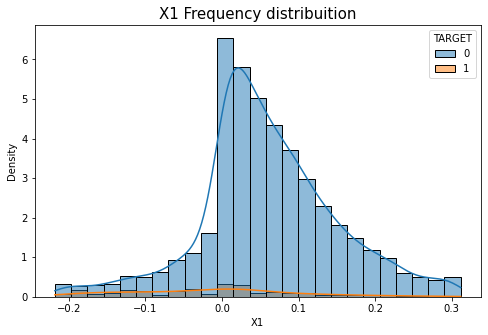

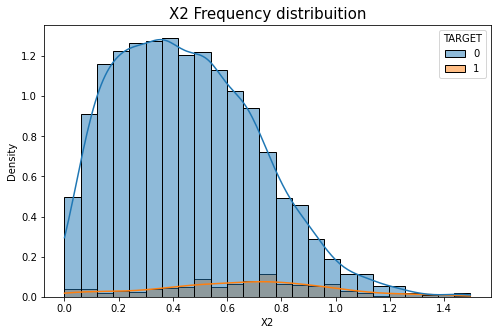

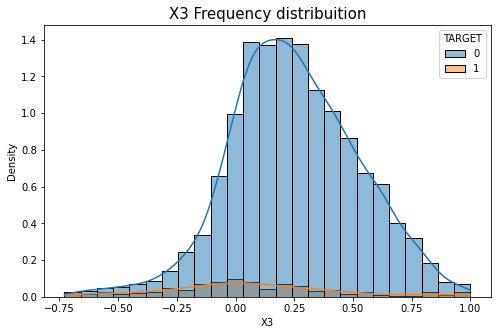

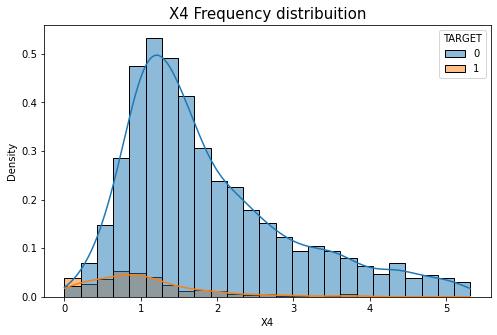

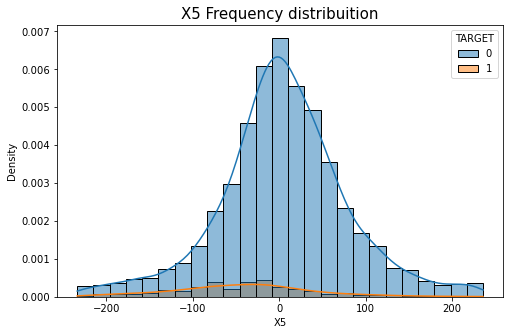

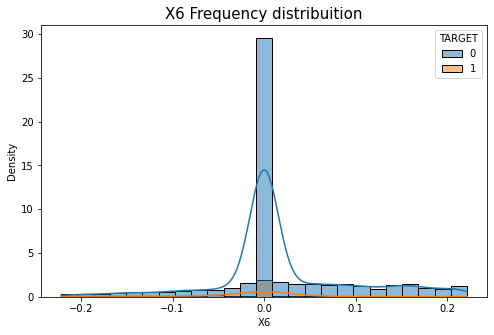

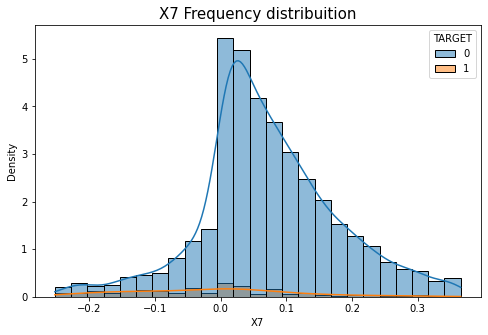

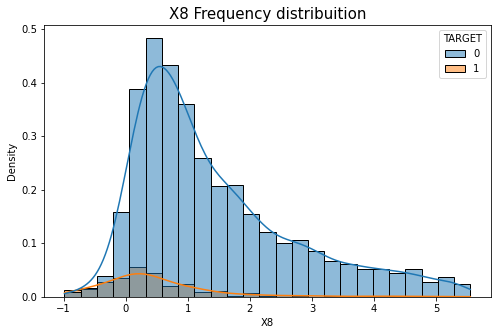

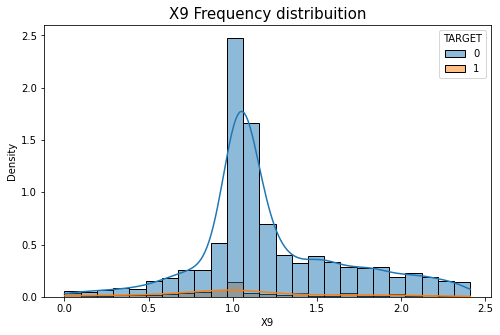

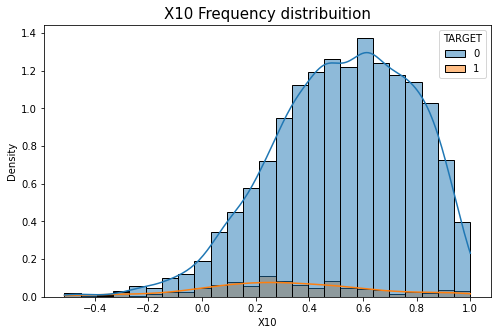

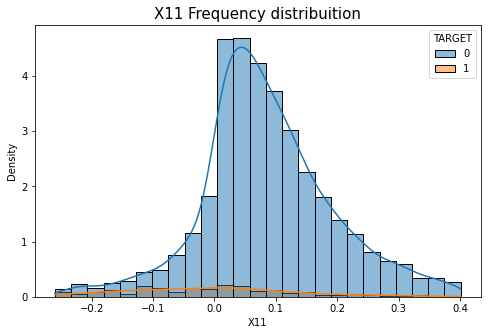

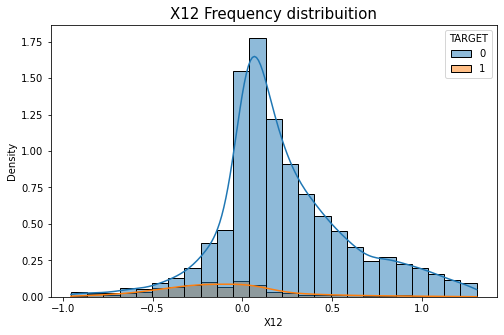

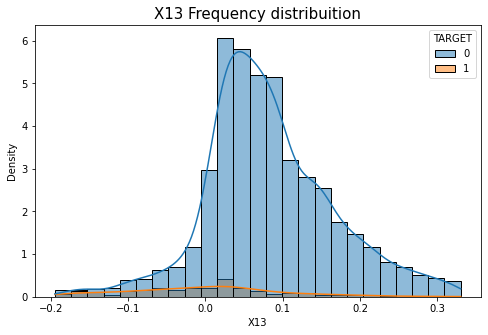

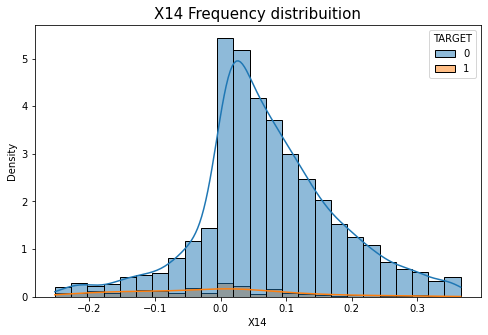

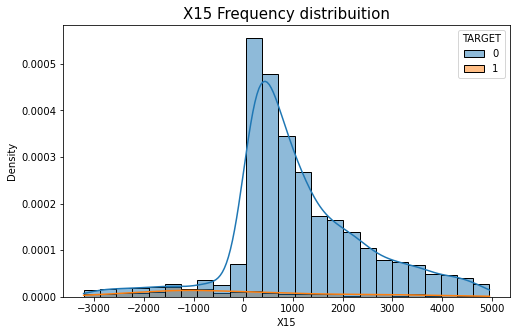

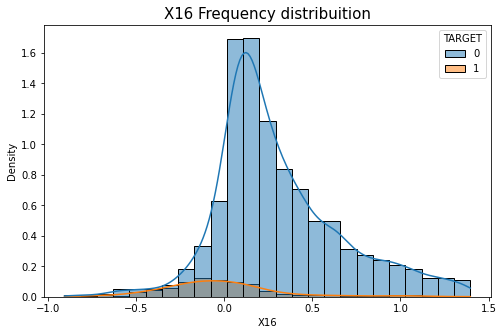

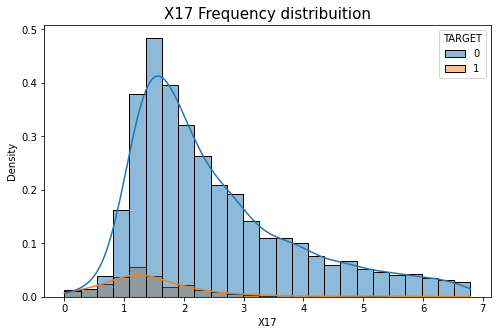

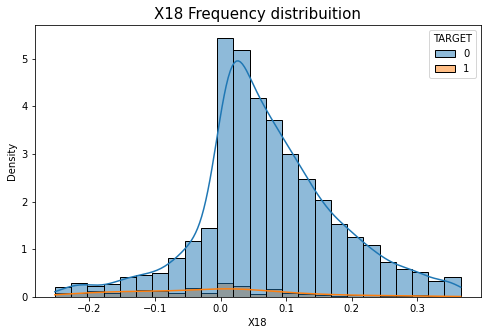

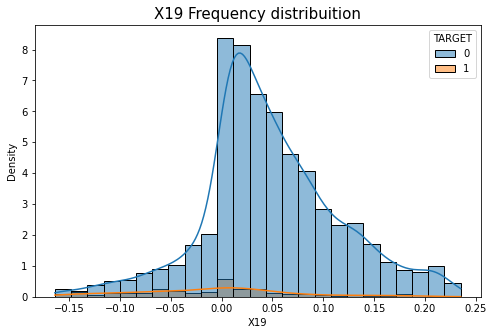

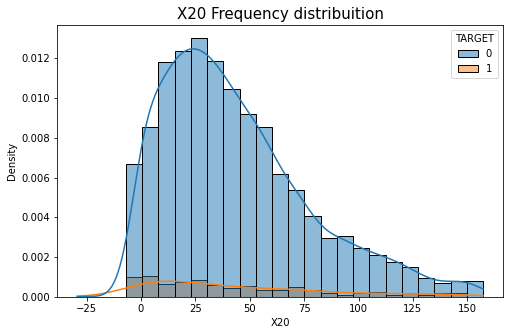

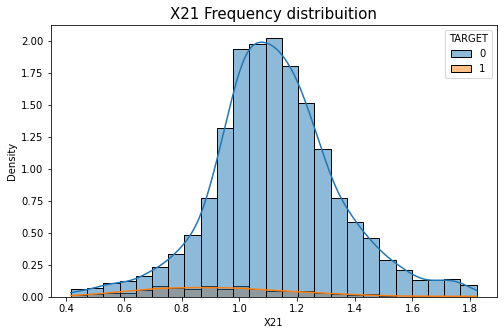

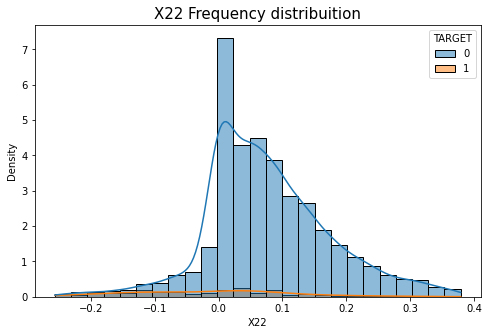

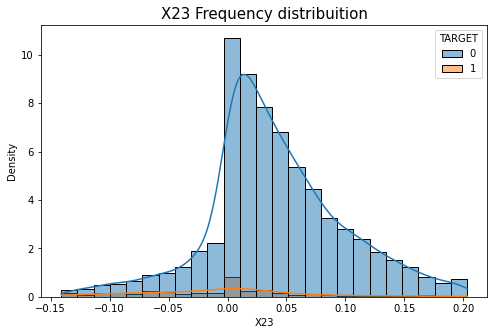

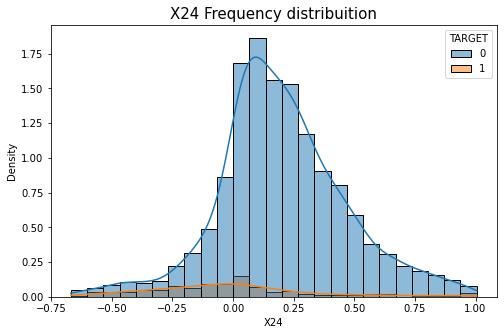

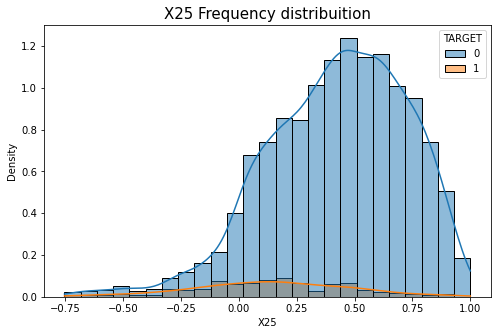

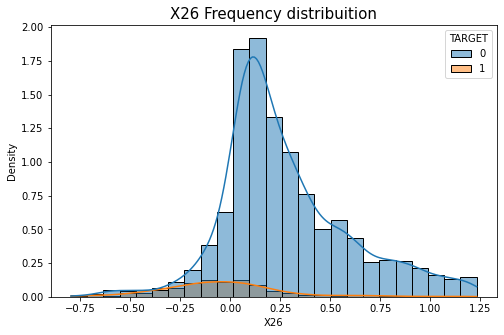

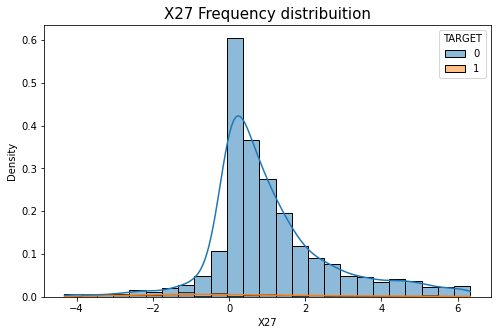

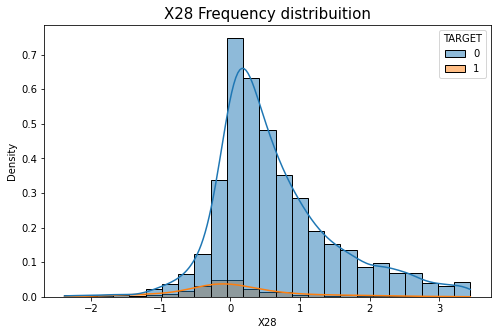

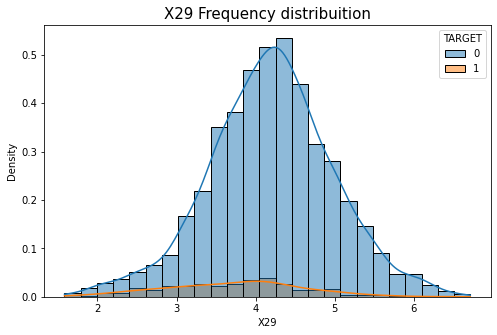

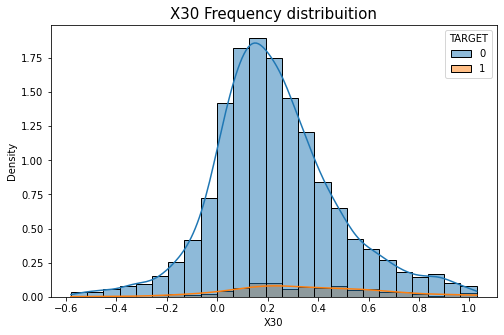

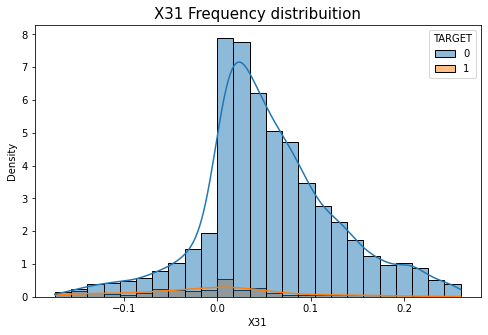

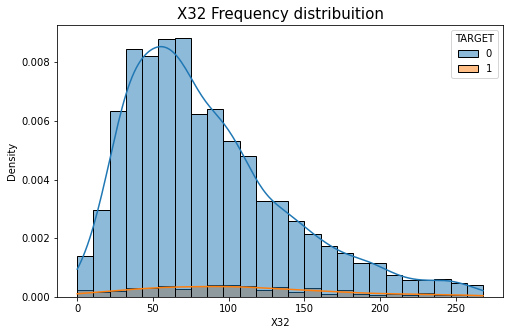

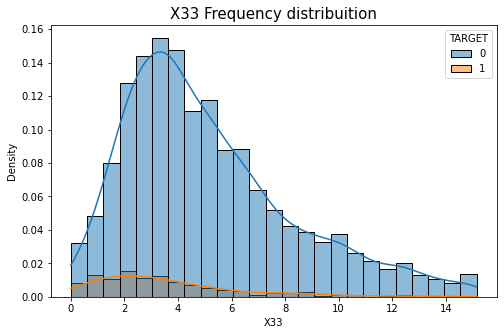

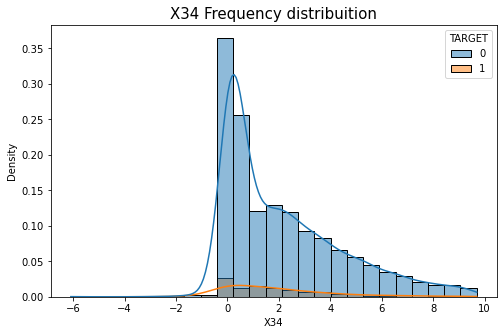

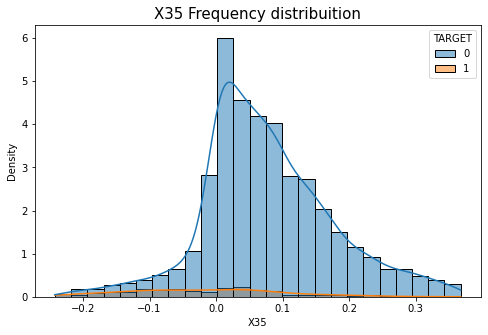

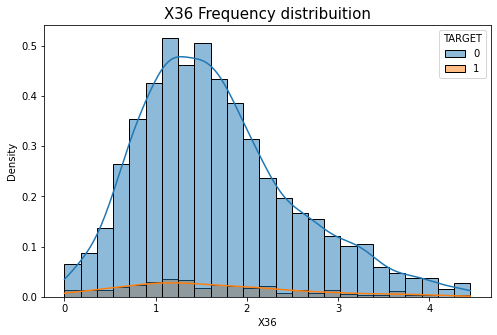

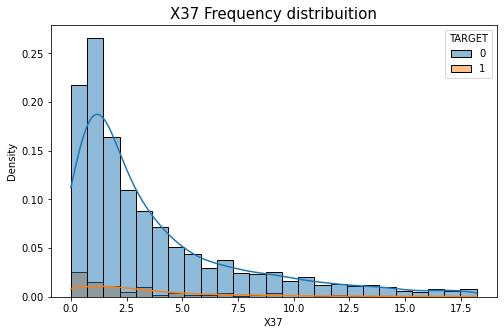

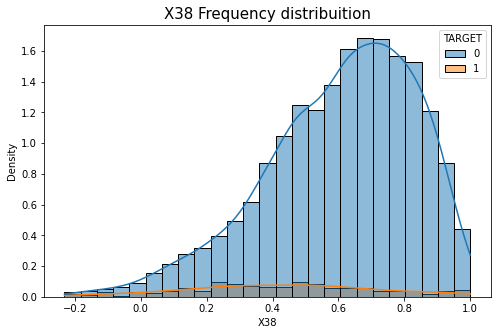

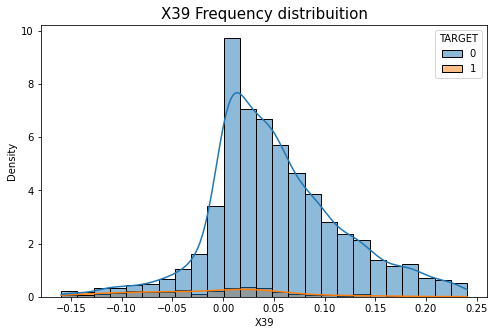

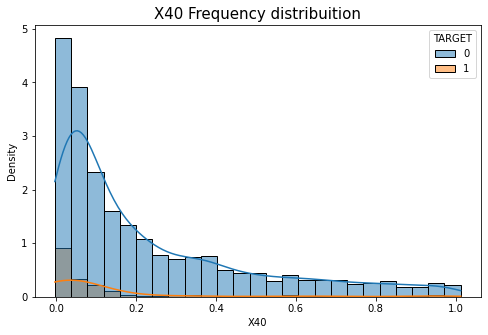

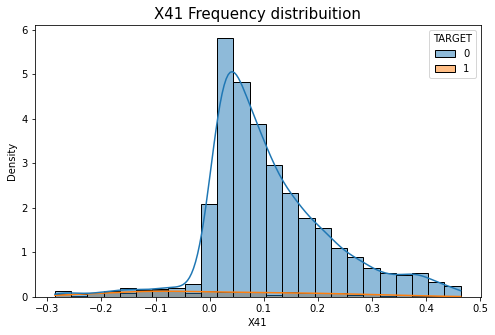

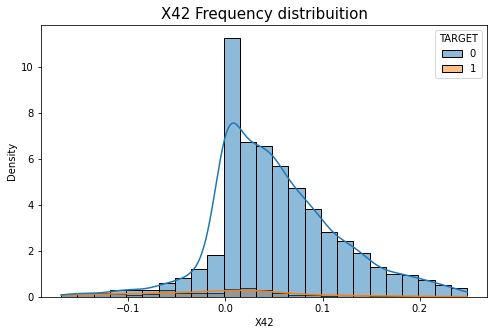

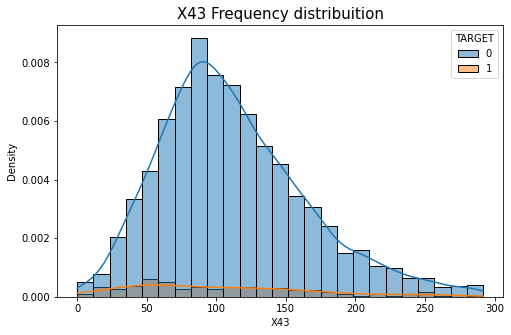

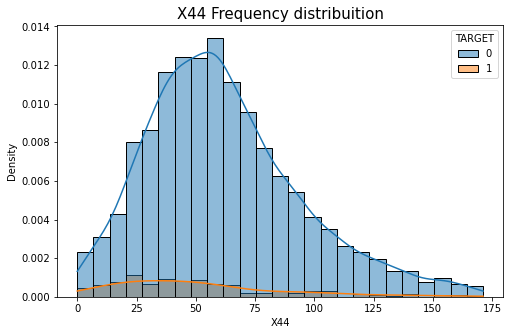

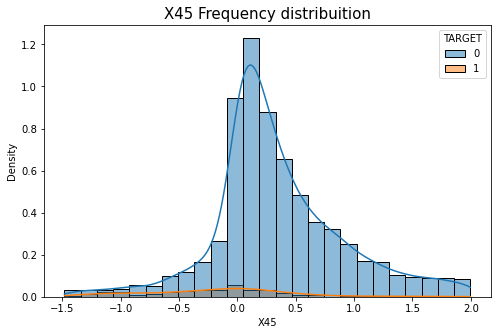

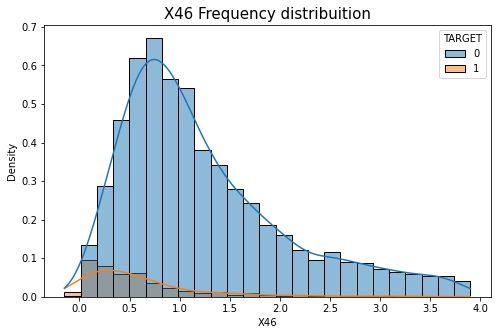

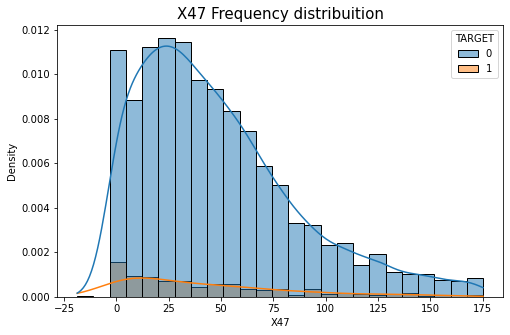

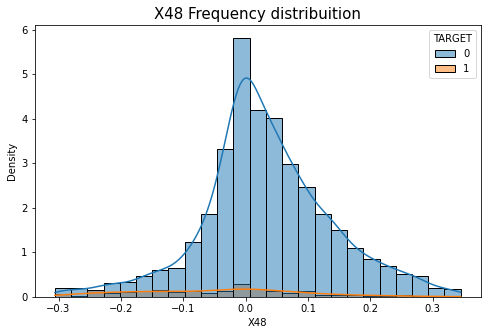

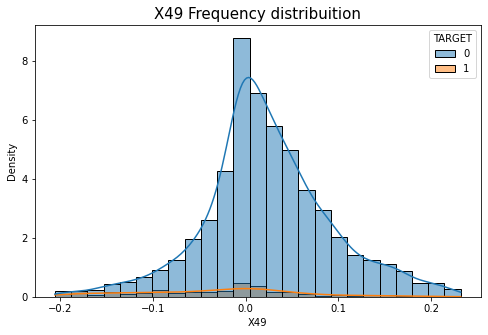

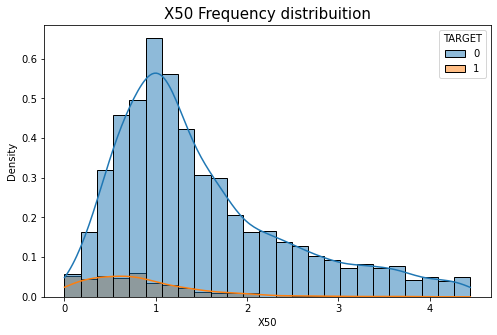

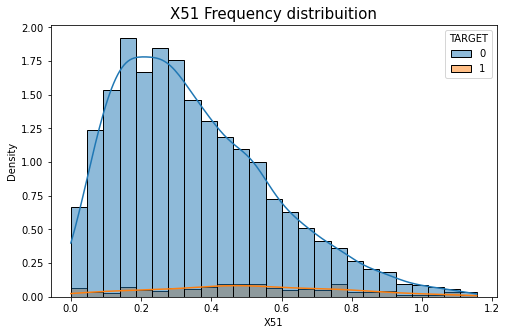

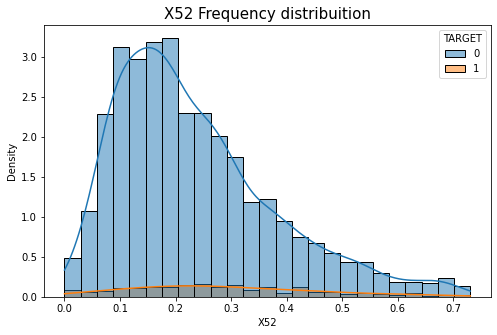

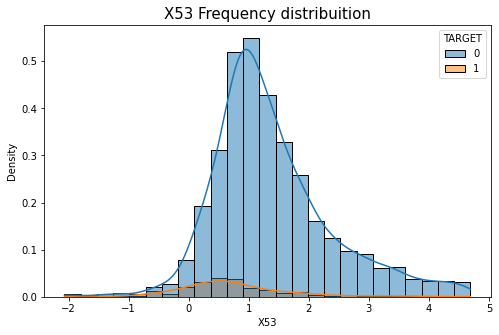

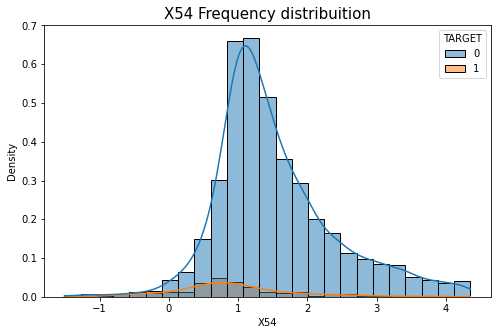

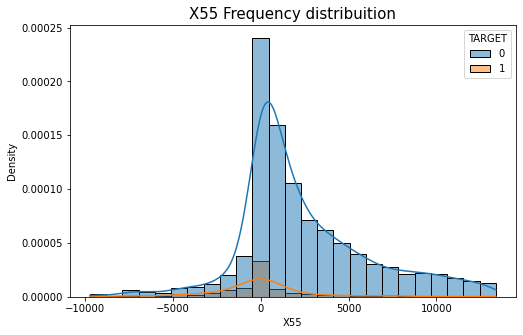

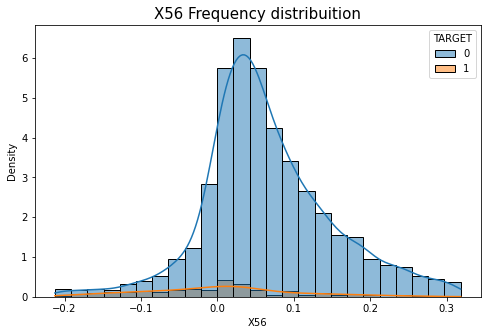

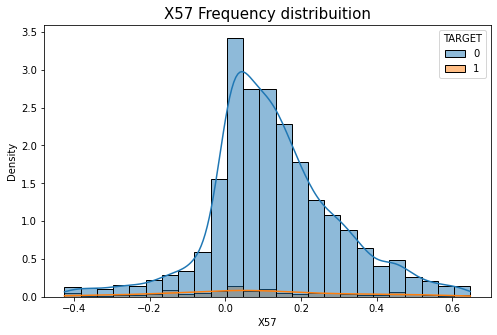

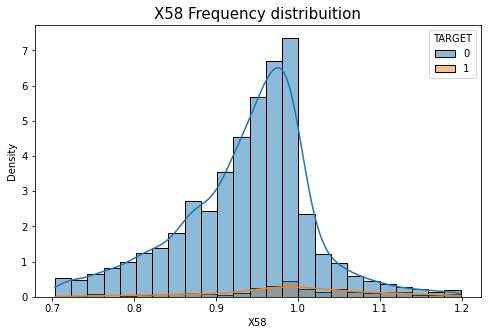

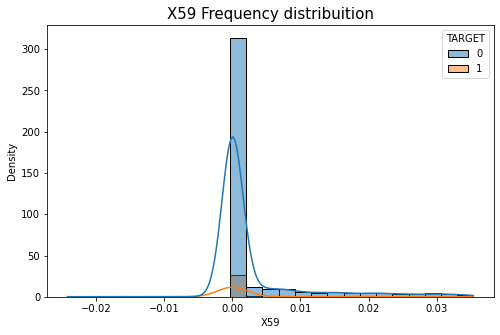

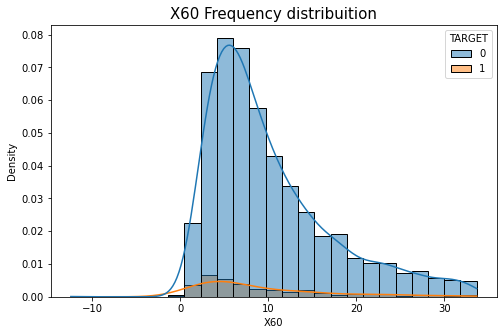

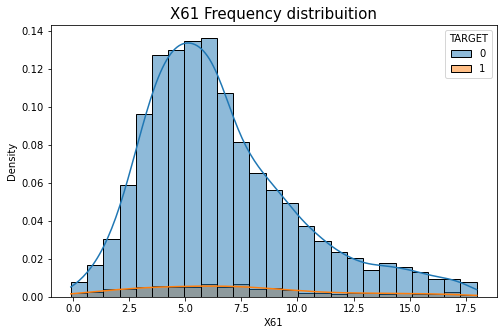

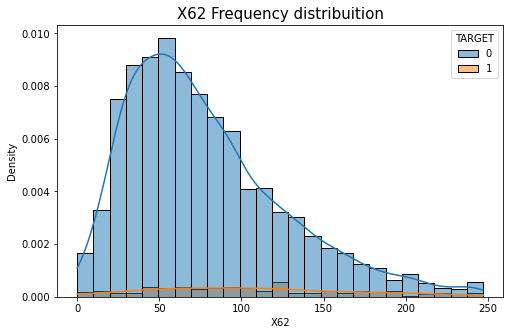

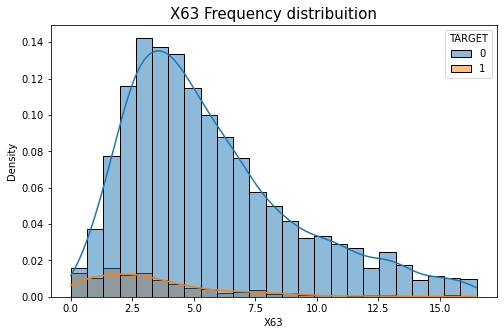

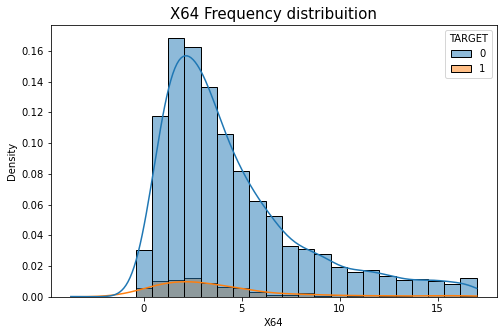

Dataset has 0 variance; skipping density estimate.
Dataset has 0 variance; skipping density estimate.


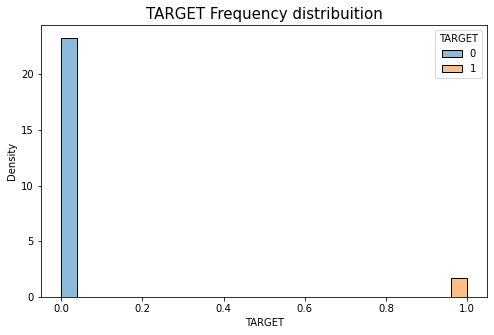

In [19]:
for key in list(df.keys()):
    if df[key].dtypes!='object':
        plt.figure(figsize = (8,5))
        g=sns.histplot(x= key,
              data=df,
              bins=25,
              hue="TARGET",
              stat = "density",
              common_norm=True,
              kde=True)
        g.set_title(key+" Frequency distribuition", fontsize=15)
        plt.show()
    else:
        print(key+" is a String Variable! numerize it first")

> After locating the outliers with z-score, we can already see the actual distribution of our variables, which also all make sense.

In [25]:
df_filtered.isnull().sum()

X1     368
X2      84
X3      72
X4     466
X5     332
      ... 
X60    636
X61    304
X62    258
X63    264
X64    705
Length: 64, dtype: int64

### Filling NA's values using mean of the column

In [26]:
X = df_filtered.fillna(df_filtered.mean())

- We no longer have null values

In [27]:
X.isnull().sum()

X1     0
X2     0
X3     0
X4     0
X5     0
      ..
X60    0
X61    0
X62    0
X63    0
X64    0
Length: 64, dtype: int64

## Feature Selection

> We will choose the top 10 variables for our model based on the AUC result, which is related to the Sommer's D value which is very useful to know which variables are most important in classifier algorithms 
$$ AUC =  (Dxy + 1)  /  2 $$

> We are not going to categorize the variables, since the method by which we are going to filter them does not allow it, because they would give us all the same result. In addition, since we are only going to use 10 varibles, to be able to compare our result with the initial model, if we categorize them we would be introducing very little information to the algorithm and possibly we could suffer underfitting.

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [29]:
from sklearn.feature_selection import VarianceThreshold

#remove constant and quasi constant features

constant_filter = VarianceThreshold(threshold=0.01)
constant_filter.fit(X_train)
X_train_filter = constant_filter.transform(X_train)
X_test_filter = constant_filter.transform(X_test)
X_train_filter.shape, X_test_filter.shape

((2895, 50), (1242, 50))

> We have remove 64-50 = 14 constant and quasi constant features then we will only usu this 50 features

In [30]:
#remove duplicate features

X_train_T = X_train_filter.T
X_test_T = X_test_filter.T
X_train_T = pd.DataFrame(X_train_T)
X_test_T = pd.DataFrame(X_test_T)

In [31]:
duplicated_features = X_train_T.duplicated()

> We dont have duplicate features

In [32]:
features_to_keep = [not index for index in duplicated_features]
X_train_unique = X_train_T[features_to_keep].T
X_test_unique = X_test_T[features_to_keep].T
X_train_unique.shape, X_train.shape

((2895, 50), (2895, 64))

In [33]:
X_train_unique

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.554720,0.011340,1.020500,-66.520000,0.109490,0.577520,1.088100,0.320360,0.109490,0.197600,...,0.425570,0.737170,0.738660,2251.913999,0.275430,7.27110,4.734300,142.760000,2.556800,3.259700
1,0.299730,0.300880,3.102200,35.862000,0.143820,2.220700,1.153800,0.665590,0.143820,1.004900,...,0.150990,1.197100,1.478800,2251.913999,0.171060,5.18810,9.796300,47.763000,7.641900,1.967100
2,1.055900,0.199610,1.287000,-63.176000,0.067262,-0.052947,1.015000,-0.055907,-0.212810,-0.369750,...,0.565070,-0.533150,2.887600,491.560000,0.126332,2.64550,2.988900,79.863937,1.459300,9.679300
3,0.459760,0.423570,1.921300,79.068000,0.148430,1.175000,1.791100,0.540240,0.172580,0.322830,...,0.278950,4.630600,1.498533,979.600000,0.274750,28.83600,2.629300,93.691000,3.895800,15.353000
4,1.146600,0.237146,0.144620,1.507543,-0.034221,-0.127860,0.155400,-0.146600,0.001426,-0.029845,...,0.238535,-0.175740,-0.175740,-282.740000,0.233570,0.98131,6.656577,79.863937,0.135530,0.186290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2890,0.152660,0.175400,2.149000,5.686300,0.119980,5.550500,1.211639,0.847340,0.139280,0.785920,...,0.045882,1.261000,1.261000,356.210000,0.127750,27.69400,6.656577,16.331000,5.523473,5.078000
2891,0.000000,1.000000,1.820858,126.540000,0.067262,1.357165,1.211639,1.000000,0.080246,0.208210,...,0.000000,1.343458,1.498533,45.960000,0.126332,10.09052,16.288000,0.000000,5.523473,4.473796
2892,0.529920,0.243320,1.477000,-42.749000,0.001551,0.887070,1.812100,0.470080,0.082183,0.003041,...,0.289430,1.906700,1.987000,474.650000,0.001359,4.03040,6.055100,102.760000,3.552100,7.350000
2893,0.039307,0.333970,1.820858,141.890000,0.109590,1.357165,1.162600,0.944340,0.109590,0.208210,...,0.063684,1.506800,1.506800,10379.000000,0.092917,6.59270,5.955500,19.994000,5.523473,1.145000


- We create a basic classifier to choose the most important variables

In [34]:
roc_auc = []
for feature in X_train_unique.columns:
    clf = RandomForestClassifier() 
    clf.fit(X_train_unique[feature].to_frame(), y_train)
    y_pred = clf.predict(X_test_unique[feature].to_frame())
    roc_auc.append(roc_auc_score(y_test, y_pred))

In [35]:
roc_values = pd.Series(roc_auc)
roc_values.index = X_train_unique.columns
roc_values.sort_values(ascending = False, inplace = True)

In [36]:
sel = roc_values.iloc[:10]
# sel.index
sel.index

Int64Index([35, 31, 12, 48, 9, 2, 19, 13, 17, 5], dtype='int64')

## Model

In [37]:
from sklearn.model_selection import  GridSearchCV
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix

In [38]:
X_train_roc = X_train_unique[sel.index]
X_test_roc = X_test_unique[sel.index]

In [39]:
# Create the parameter grid based on the results of random search

param_grid = {
    'bootstrap': [True, False],
    'max_depth': [80, 100, 200],
    'max_features': ['auto','log2' ],
    'min_samples_leaf': [1, 3, 5,7],
    'min_samples_split': [3, 5, 7, 9],
    'n_estimators': [100, 200, 300],
    'oob_score': [True, False]
}
    
# Create a based model
rf = RandomForestClassifier()
    
# Instantiate the grid search model using cross-validation
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 2, n_jobs = -1, verbose = 1)

In [40]:
# Fit the grid search to the data

grid_search=grid_search.fit(X_train_roc, y_train)
grid_search.best_params_

Fitting 2 folds for each of 1152 candidates, totalling 2304 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   41.3s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 2304 out of 2304 | elapsed:  7.1min finished


{'bootstrap': True,
 'max_depth': 200,
 'max_features': 'auto',
 'min_samples_leaf': 7,
 'min_samples_split': 5,
 'n_estimators': 100,
 'oob_score': False}

In [41]:
# Model definition

the_model = RandomForestClassifier(bootstrap=grid_search.best_params_['bootstrap'], 
                      n_estimators=grid_search.best_params_['n_estimators'],ccp_alpha=0.0, criterion='gini',
                      max_depth=grid_search.best_params_['max_depth'], max_features=grid_search.best_params_['max_features'], 
                      max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
                      min_samples_split=grid_search.best_params_['min_samples_split'], min_weight_fraction_leaf=0.0,
                      n_jobs=-1, oob_score=False,
                      random_state=1, verbose=0, warm_start=True)

In [42]:
# Model Training
the_model.fit(X_train_roc, y_train)
y_pred = the_model.predict(X_test_roc)

print("Testing score data: ")
print(the_model.score(X_test_roc, y_test))
print("Testing score data: ")
print(accuracy_score(y_test,y_pred))
print("\n")
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

Testing score data: 
0.9428341384863124
Testing score data: 
0.9428341384863124


[[1147    9]
 [  62   24]]


              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1156
           1       0.73      0.28      0.40        86

    accuracy                           0.94      1242
   macro avg       0.84      0.64      0.69      1242
weighted avg       0.93      0.94      0.93      1242



In [43]:
#prediction an train Metrics
y_train_pred = the_model.predict_proba(X_train_roc)[:,1]
print(y_train_pred)
AUC_train    = roc_auc_score(y_train, y_train_pred)
print("AUC:", AUC_train) 

[0.01202636 0.         0.13396168 ... 0.0417838  0.0202831  0.5087906 ]
AUC: 0.9741456045681024


In [44]:
#prediction an train Metrics
y_test_pred = the_model.predict_proba(X_test_roc)[:, 1]
print(y_train_pred)
AUC_test    = roc_auc_score(y_test, y_test_pred)
print("AUC:", AUC_test)

[0.01202636 0.         0.13396168 ... 0.0417838  0.0202831  0.5087906 ]
AUC: 0.8189878892733564


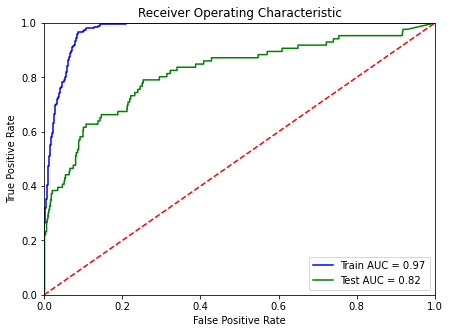

In [45]:
# Generate ROC curve values: fpr, tpr, thresholds

train_fpr, train_tpr, train_threshold = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, test_threshold = roc_curve(y_test, y_test_pred)

train_roc_auc = auc(train_fpr, train_tpr)
test_roc_auc = auc(test_fpr, test_tpr)

# Plotting ROC curve

fig, ax = plt.subplots(figsize=[7,5])
plt.title('Receiver Operating Characteristic')
plt.plot(train_fpr, train_tpr, 'b', label = 'Train AUC = %0.2f' % train_roc_auc)
plt.plot(test_fpr, test_tpr, 'g', label = 'Test AUC = %0.2f' % test_roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Cheking the results of our model

In [46]:
df_results= pd.DataFrame()
df_results["Target"]=y_test
df_results["pred"]=y_test_pred

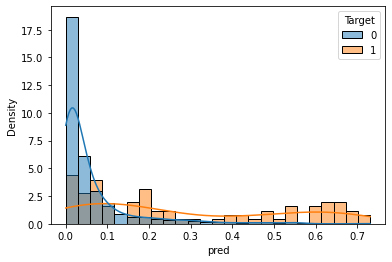

In [47]:
g=sns.histplot(x= "pred",
              data=df_results,
              bins=25,
              hue="Target",
              stat = "density",
              common_norm=False,
              kde=True)

- With this graph we interpret that a higher proportion of TARGET 1 samples have been incorrectly classified,because there should be no TARGET 1 sample, before the value of 0.5. It makes sense since, our original dataset has a very low amount of these samples, therefore it has not been able to classify them correctly. For a higher success rate, we may need to include more target 1 samples in our dataset.

### Feature Importance

 - This graph shows the weight that each variable has had within the algorithm, to predict the result

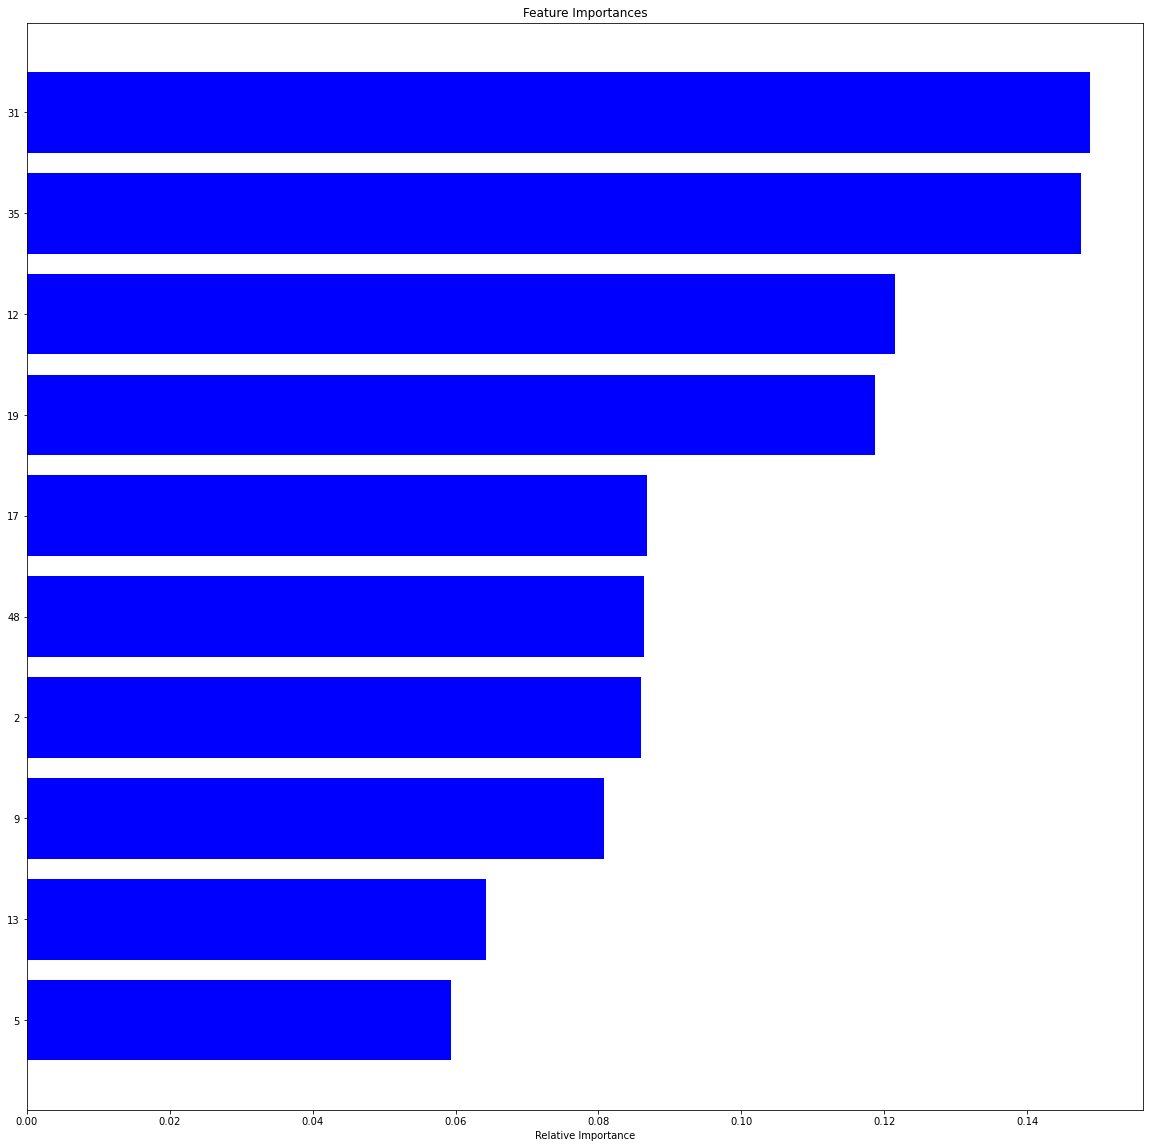

In [48]:
importances = the_model.feature_importances_
indices = np.argsort(importances)
features = X_train_roc.columns

# Plotting feature importance

fig,ax = plt.subplots(figsize=(20,20))

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Shapley values

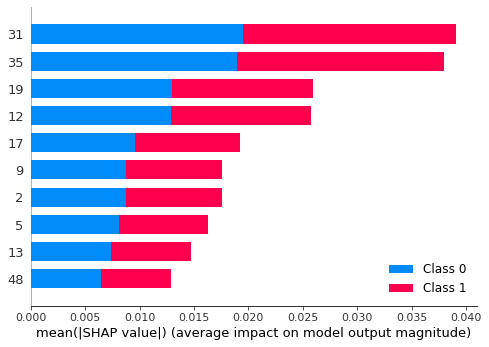

In [49]:
feature_names = list(sel.index)

# Calculating shapley values

shap_values = shap.TreeExplainer(the_model).shap_values(X_test_roc)

# Ploting bar shapley values

shap.summary_plot(shap_values, X_test_roc,feature_names=feature_names, plot_type="bar", max_display=10 )

> In this plot we also can see the importance of each feature, but we also can dicover de influence of each one in the different classes

### Plotting class 0 influence
- **Class 0 calculates the probability of belonging to target 0**

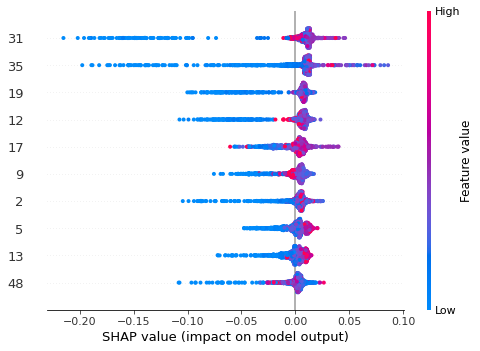

In [50]:
# Ploting dot shapley values

shap.summary_plot(shap_values[0], X_test_roc, feature_names=feature_names, plot_type="dot", max_display=10)

> This plot is made of all the dots in the train data. It demonstrates the following information:
> - Feature importance: Variables are ranked in descending order.
> - Impact: The horizontal location shows whether the effect of that value is associated with a higher or lower prediction.
> - Original value: Color shows whether that variable is high (in red) or low (in blue) for that observation.
> - Correlation : shown by X-axis

### Plotting class 1 influence
- **Class 1 calculates the probability of belonging to target 1**

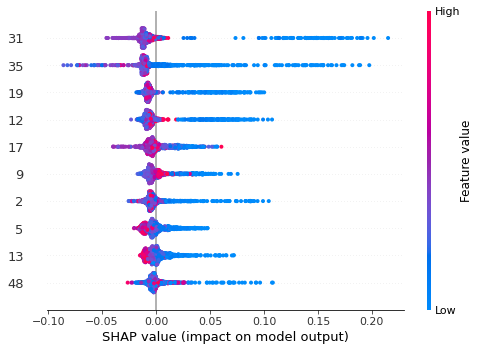

In [51]:
# PLoting dot shapley values

shap.summary_plot(shap_values[1], X_test_roc, feature_names=feature_names, plot_type="dot",max_display=10)

> This plot is made of all the dots in the train data. It demonstrates the following information:
> - Feature importance: Variables are ranked in descending order.
> - Impact: The horizontal location shows whether the effect of that value is associated with a higher or lower prediction.
> - Original value: Color shows whether that variable is high (in red) or low (in blue) for that observation.
> - Correlation : shown by X-axis

In [52]:
X = pd.DataFrame(X_test_roc, columns=sel.index)

In [53]:
# Attempt to use SHAP on multi-class
# X = pd.DataFrame(X, columns=list(sel.index))

X_rand = X.sample(1, random_state=4)
idx = X_rand.index.values[0]

# Generate a prediction for the row

display(the_model.predict(X_rand))
display(the_model.predict_proba(X_rand))

array([0], dtype=int64)

array([[0.88925397, 0.11074603]])

- This graph shows how the variables chosen in a given sample have infused, resulting in the likelihood of perishing to class 0 or 1.

In [54]:
# Plotting that row

explainer = shap.TreeExplainer(the_model)
shap_values = explainer.shap_values(X.iloc[idx])
shap.initjs()
for which_class in range(0,2):
    display(shap.force_plot(explainer.expected_value[which_class], shap_values[which_class], X_rand))

> As conclusion, after analyzing the charts, we can say that all the variables that we have included in our model have behaved as expected. In addition, with the same number of variables as the proposed initial model we have substantially improved the percentage of  the AUC, which is  the variable by which we have guided ourselves to select our best variables.

## According to these statistical results, based on Sommer's D values,  these are the most important variables at bussines level

### Total Assets 
> Total assets refers to the total amount of assets owned by a person or entity. Assets are items of economic value, which are expended over time to yield a benefit for the owner. If the owner is a business, these assets are usually recorded in the accounting records and appear in the balance sheet of the business. 

> Owners may look at their total assets in regard to which can be converted most quickly into cash. An asset is said to be more liquid if it can be readily sold for cash, and illiquid if this is not the case. The liquidity concept is also used for the presentation of assets within the balance sheet, with the most liquid items (such as cash) listed at the top and the least liquid (such as fixed assets) listed closer to the bottom. This order of liquidity appears in the preceding bullet point list of assets.


### Total liabilities 
> Total liabilities are the combined debts and obligations that an individual or company owes to outside parties. Everything the company owns is classified as an asset and all amounts the company owes for future obligations are recorded as liabilities. On the balance sheet, total assets minus total liabilities equals equity.

> A larger amount of total liabilities is not in-and-of-itself a financial indicator of poor economic quality of an entity. Based on prevailing interest rates available to the company, it may be most favorable for the business to acquire debt assets by incurring liabilities. 

> However, the total liabilities of a business have a direct relationship with the creditworthiness of an entity. In general, if a company has relatively low total liabilities, it may gain favorable interest rates on any new debt it undertakes from lenders, as lower total liabilities lessen the chance of default risk.


### Current liabilities
> Current liabilities are a company's short-term financial obligations that are due within one year or within a normal operating cycle. An operating cycle, also referred to as the cash conversion cycle, is the time it takes a company to purchase inventory and convert it to cash from sales. An example of a current liability is money owed to suppliers in the form of accounts payable.

> Current Liabilities formula = Notes payable + Accounts payable + Accrued expenses + Unearned revenue + Current portion of long term debt + other short term debt.

> Analysts and creditors often use the current ratio. The current ratio measures a company's ability to pay its short-term financial debts or obligations. The ratio, which is calculated by dividing current assets by current liabilities, shows how well a company manages its balance sheet to pay off its short-term debts and payables. It shows investors and analysts whether a company has enough current assets on its balance sheet to satisfy or pay off its current debt and other payables.


### Current assets

> Current assets represent all the assets of a company that are expected to be conveniently sold, consumed, used, or exhausted through standard business operations with one year. Current assets include cash, cash equivalents, accounts receivable, stock inventory, marketable securities, pre-paid liabilities, and other liquid assets.

> Current assets are important to businesses because they can be used to fund day-to-day business operations and to pay for ongoing operating expenses. Since the term is reported as a dollar value of all the assets and resources that can be easily converted to cash in a short period, it also represents a company’s liquid assets.

> However, care should be taken to include only the qualifying assets that are capable of being liquidated at the fair price over the next one-year period. For instance, there is a strong likelihood that many commonly used fast-moving consumer goods (FMCG) goods produced by a company can be easily sold over the next year. Inventory is included in the current assets, but it may be difficult to sell land or heavy machinery, so these are excluded from the current assets.

> Depending on the nature of the business and the products it markets, current assets can range from barrels of crude oil, fabricated goods, work in progress inventory, raw materials, or foreign currency..


###  Financial Expenses / Cost of Goods Sold

> Cost of goods sold (COGS) refers to the direct costs of producing the goods sold by a company. This amount includes the cost of the materials and labor directly used to create the good. It excludes indirect expenses, such as distribution costs and sales force costs. 

> The COGS is an important metric on the financial statements as it is subtracted from a company’s revenues to determine its gross profit. The gross profit is a profitability measure that evaluates how efficient a company is in managing its labor and supplies in the production process.

> Because COGS is a cost of doing business, it is recorded as a business expense on the income statements. Knowing the cost of goods sold helps analysts, investors, and managers estimate the company’s bottom line. If COGS increases, net income will decrease. While this movement is beneficial for income tax purposes, the business will have less profit for its shareholders. Businesses thus try to keep their COGS low so that net profits will be higher.

### EBIT

> Earnings before interest and taxes measures the profit a company generates from its operations making it synonymous with operating profit. By ignoring taxes and interest expense, EBIT focuses solely on a company's ability to generate earnings from operations, ignoring variables such as the tax burden and capital structure. EBIT is an especially useful metric because it helps to identify a company's ability to generate enough earnings to be profitable, pay down debt, and fund ongoing operations.

- EBIT and Taxes

> EBIT is also helpful to investors who are comparing multiple companies with different tax situations. For example, let's say an investor is thinking of buying stock in a company, EBIT can help to identify the operating profit of the company without taxes being factored into the analysis. If the company recently received a tax break or there was a cut in corporate taxes in the United States, the company's net income or profit would increase.

> However, EBIT removes the benefits from the tax cut out of the analysis. EBIT is helpful when investors are comparing two companies in the same industry but with different tax rates.

- EBIT and Debt

> EBIT is helpful in analyzing companies that are in capital-intensive industries, meaning the companies have a significant amount of fixed assets on their balance sheets. Fixed assets are physical property, plant, and equipment and are typically financed by debt. For example, companies in the oil and gas industry are capital intensive because they have to finance their drilling equipment and oil rigs.

> As a result, capital intensive industries have high-interest expenses due to a large amount of debt on their balance sheets. However, the debt, if managed properly, is necessary for the long-term growth of companies in the industry.

> Companies in capital-intensive industries might have more or less debt when compared to each other. As a result, the companies would have more or fewer interest expenses when compared to each other. EBIT helps investors to analyze companies' operating performance and earnings potential while stripping out debt and the resulting interest expense.


### Net Profit Margin 
> The net profit margin is equal to how much net income or profit is generated as a percentage of revenue. Net profit margin is the ratio of net profits to revenues for a company or business segment. Net profit margin is typically expressed as a percentage but can also be represented in decimal form. The net profit margin illustrates how much of each dollar in revenue collected by a company translates into profit.

> Net profit margin is one of the most important indicators of a company's financial health. By tracking increases and decreases in its net profit margin, a company can assess whether current practices are working and forecast profits based on revenues. Because companies express net profit margin as a percentage rather than a dollar amount, it is possible to compare the profitability of two or more businesses regardless of size.

> Investors can assess if a company's management is generating enough profit from its sales and whether operating costs and overhead costs are being contained. For example, a company can have growing revenue, but if its operating costs are increasing at a faster rate than revenue, its net profit margin will shrink. Ideally, investors want to see a track record of expanding margins meaning that net profit margin is rising over time.

> Most publicly traded companies report their net profit margins both quarterly during earnings releases and in their annual reports. Companies that can expand their net margins over time are generally rewarded with share price growth, as share price growth is typically highly correlated earnings growth.


### Inventories 
> Listed on the Balance Sheet, Inventories are the products the company intends to sell, or what is used in the manufacture or fulfillment of products or services they intend to sell. A retail company will usually simply list their inventories as the products they will be selling. For manufacturing companies, Inventories might be broken down into three different types of Inventories:1. raw materials2. work-in-process3. finished goods

> Watch Inventories closely. You may at first think that a company with large Inventories is a good thing as they would be ready for any unexpected increase in sales, when in fact companies with large inventories may be a sign of poor efficiency in their retail, manufacturing, or general business processes.

> When a company purchases products for retail, or items that will eventually be made into finished goods, this is money that is no longer cash – money that could be instead invested to gain a return. So instead of having cash invested that would be generating revenue on its own, the company would be buying items that will simply be stored. Even worse, these items would be taking up building space, which the company bought or leases and which is often heated or cooled.

> Depending on the type of inventory, spoilage of the inventory may occur – and the cash the company spent on this inventory would be wasted.

### Working capital

> Working capital, also known as net working capital (NWC), is the difference between a company’s current assets, such as cash, accounts receivable (customers’ unpaid bills) and inventories of raw materials and finished goods, and its current liabilities, such as accounts payable. Net operating working capital is a measure of a company's liquidity and refers to the difference between operating current assets and operating current liabilities. In many cases these calculations are the same and are derived from company cash plus accounts receivable plus inventories, less accounts payable and less accrued expenses.

> Working capital is a measure of a company's liquidity, operational efficiency and its short-term financial health. If a company has substantial positive working capital, then it should have the potential to invest and grow. If a company's current assets do not exceed its current liabilities, then it may have trouble growing or paying back creditors, or even go bankrupt.

### Profit on operating activities

> Operating activities are the daily activities of a company involved in producing and selling its product, generating revenues, as well as general administrative and maintenance activities. The operating income shown on a company's financial statements is the operating profit remaining after deducting operating expenses from operating revenues. There is typically an operating activities section of a company's statement of cash flows that shows inflows and outflows of cash resulting from a company's key operating activities. Cash flows from operations are an important metric used by financial analysts and investors.

> In the event of ambiguity, operating activities can readily be identified by classification in financial statements. Many companies report operating income or income from operations as a specific line on the income statement. Operating income is calculated by subtracting the cost of sales (COGS), research and development (R&D) expenses selling and marketing expenses, general and administrative expenses, and depreciation and amortization expenses. 

> Operating activities can be contrasted with the investing and financing activities of a firm.



### Depreciation 

>Depreciation is an accounting convention that allows a company to write off an asset's value over a period of time, commonly the asset's useful life. Assets such as machinery and equipment are expensive. Instead of realizing the entire cost of the asset in year one, depreciating the asset allows companies to spread out that cost and generate revenue from it.

>Depreciation is used to account for declines in the carrying value over time. Carrying value represents the difference between the original cost and the accumulated depreciation of the years.

>Each company might set its own threshold amounts for when to begin depreciating a fixed asset–or property, plant, and equipment. For example, a small company may set a 500 dollars threshold, over which it depreciates an asset. On the other hand, a larger company may set a 10,000 dollars threshold, under which all purchases are expensed immediately.

>The entire cash outlay might be paid initially when an asset is purchased, but the expense is recorded incrementally for financial reporting purposes because assets provide a benefit to the company over a lengthy period of time. Therefore, depreciation is considered a non-cash charge since it doesn't represent an actual cash outflow. However, the depreciation charges still reduce a company's earnings, which is helpful for tax purposes.

>The matching principle under generally accepted accounting principles (GAAP) is an accrual accounting concept that dictates that expenses must be matched to the same period in which the related revenue is generated. Depreciation helps to tie the cost of an asset with the benefit of its use over time. In other words, each year, the asset is put to use and generates revenue, the incremental expense associated with using up the asset is also recorded.

>The total amount that's depreciated each year, represented as a percentage, is called the depreciation rate. For example, if a company had 100,000 dollars in total depreciation over the asset's expected life, and the annual depreciation was 15,000 dollars; the rate would 15% per year.
